# Table of Contents
[1. Objectives and Structure](#1)<br>
[2. Data Sets](#2)<br>
[3. Demo](#3)<br>
&nbsp;&nbsp;&nbsp;[3.1 Feature Engineering and Data Cleaning](#4)<br>
&nbsp;&nbsp;&nbsp;[3.2 Univariate Analysis](#5)<br>
&nbsp;&nbsp;&nbsp;[3.3 Multivariate Analysis](#6)<br>
[4. Firmo](#7)<br>
&nbsp;&nbsp;&nbsp;[4.1 Feature Engineering and Data Cleaning](#8)<br>
&nbsp;&nbsp;&nbsp;[4.2 Univariate Analysis](#9)<br>
&nbsp;&nbsp;&nbsp;[4.3 Multivariate Analysis](#10)<br>

<hr class="solid">

# 1. Objectives and Structure
<a id="1"></a> 


**Main goal:** produce a  comprehensive  report  that  identifies  the  **main  customer  segments**,  accompanied  by  a **preliminary marketing plan** that will serve as a guide for future initiatives.

- Costumer Value segmentation
- Costumer Behavior segmentation

**Structure**
- **Exploration**: Population description  using statistical measures, visualizations, and business insights that reflect the most significant findings.
<br></br>
- **Preprocessing:** steps to transform raw data into prepared data for clustering:<br> &nbsp;&nbsp;-data cleaning, <br>&nbsp;&nbsp;-transformation(feature engineering)<br>&nbsp;&nbsp;-reduction.
<br></br>
- **Modelling:**  Implementation  of ML models.<br> &nbsp;&nbsp; **Obligatory:** costumer value & consumer  behavior

<hr class="solid">


# 2. Data Sets
<a id="2"></a> 

### Firmo


| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Date_Adherence | Date of customer adherence to company’s card |
| Recency | Number of days since the customer's last purchase |
| MntMeat&Fish | Amount spent on meat and fish dishes |
| MntEntries | Amount spent on entries |
| MntVegan&Vegetarian | Amount spent on Vegan and Vegetarian dishes |
| MntDrinks | Amount spent on drinks |
| MntDesserts | Amount spent on desserts |
| MntAdditionalRequests | Amount spent on additional requests |
| NumOfferPurchases | Number of purchases made using promotional offers |
| NumAppPurchases | Number of purchases made through food delivery apps |
| NumTakeAwayPurchases | Number of take-away purchases |
| NumInStorePurchases | Number of in-store purchases |
| NumAppVisitsMonth | Average number of accesses to the restaurant in food delivery apps |
| Complain | Flag indicating whether the customer has made a complaint |


### Demo


| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Name | Customer’s name |
| Birthyear | Customer’s year of birth |
| Education | Customer’s level of education |
| Marital_Status | Customer’s marital status |
| Income | Customer’s yearly household income |
| Kid_Younger6 | Number of kids younger than 6 in the household |
| Children_6to18 | Number of children between 6 and 18 years old in the household |


### Marketing

| Variable | Description |
| --- | --- |
| CustomerID | Customer unique identification |
| Response_Cmp1 | Flag indicating whether the customer accepted the offer in campaign 1 |
| Response_Cmp2 | Flag indicating whether the customer accepted the offer in campaign 2 |
| Response_Cmp3 | Flag indicating whether the customer accepted the offer in campaign 3 |
| Response_Cmp4 | Flag indicating whether the customer accepted the offer in campaign 4 |
| Response_Cmp5 | Flag indicating whether the customer accepted the offer in campaign 5 |

<hr class="solid">

### Imports
<a id="3"></a> 

In [830]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

In [831]:
demo = pd.read_csv('C:\\Users\\gonca\\Downloads\\Data-Science-and-ML-main\\Data-Science-and-ML-main\\Data\\crm.csv')
mkt = pd.read_csv('C:\\Users\\gonca\\Downloads\\Data-Science-and-ML-main\\Data-Science-and-ML-main\\Data\\mkt.csv')
sales = pd.read_excel('C:\\Users\\gonca\\Downloads\\Data-Science-and-ML-main\\Data-Science-and-ML-main\\Data\\sales.xlsx')
df = demo.merge(sales).merge(mkt)

demo = demo.set_index('CustomerID')
mkt = mkt.set_index('CustomerID')
sales = sales.set_index('CustomerID')

<hr class="solid">

#  3. Demo
<a id="3"></a> 

#### 3.1 Feature Engineering and Data Cleaning
<a id="4"></a> 

##### Duplicates and NA

In [832]:
# Check duplicates
demo[demo.duplicated()].shape[0]
# Check NA - 14 on Education
demo.isnull().sum()

Name               0
Birthyear          0
Education         14
Marital_Status     0
Income             0
Kid_Younger6       0
Children_6to18     0
dtype: int64

##### Gender Column

In [833]:
demo['Gender'] = np.where(demo['Name'].str.contains('Mr.'), 'M', 'F')

##### Age Column

In [834]:
demo['Age'] = datetime.now().year - demo.Birthyear

##### Education

* Deal with Na - Fill with most frequent value?

* H1 - Divide Education in 3 labels: - Education_bins
    - High - Phd and Master
    - Medium - Graduation
    - Low - Basic + Highschool

In [835]:
#H1
demo.Education = demo.Education.str.title() 
demo['Education_bins'] = demo.Education.replace({
    'Phd': 'High',
    'Master' : 'High',
    'Graduation': 'Medium',
    'Basic' : 'Low',
    'Highschool' : 'Low'
})

##### Marital Status
* H1 - Merge into 2 categories: Together(Married + Together) & Alone(Single + Divorced + Widow) - Marital_Status_2
* H2 - Just merge Married + Together - Marital_Status_4

In [836]:
demo.Marital_Status = demo.Marital_Status.str.title()
demo.Marital_Status.value_counts()

#H1
demo['Marital_Status_2'] = demo.Marital_Status.replace({
    'Married' : 'Together',
    'Single' : 'Alone',
    'Divorced' : 'Alone',
    'Widow' : 'Alone'
})
#H2
demo['Marital_Status_4'] = demo.Marital_Status.replace('Together','Married')


##### Income
* H1 -  Use as is (treat it as a discrete quantitative var - all values are ints)
* H2 - Bin it into 3 categories - Income_bins

In [837]:
# H1 -  Min-Max scaling 

demo_copy = demo.copy()
min_income = min(demo_copy['Income'])
max_income = max(demo_copy['Income'])

income_norm = [(x - min_income) / (max_income - min_income) for x in demo_copy['Income']]

In [838]:
demo_copy['Income'] = income_norm
demo_copy.head()

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Gender,Age,Education_bins,Marital_Status_2,Marital_Status_4
CustomerID,,,,,,,,,,,,
14594,Miss Leah Lewis,1981,Graduation,Single,0.473975,0,0,F,42,Medium,Alone,Single
19070,Miss Grace Black,1974,Graduation,Together,0.475463,0,0,F,49,Medium,Together,Married
29888,Mr. Gavin Morrison,1960,Phd,Together,0.480477,0,0,M,63,High,Together,Married
12221,Mr. Ryan Glover,1980,Graduation,Married,0.419647,1,1,M,43,Medium,Together,Married
21107,Mr. Paul Anderson,1971,Highschool,Single,0.513018,0,0,M,52,Low,Alone,Single


In [839]:
#H2
demo['Income_bins']  = pd.cut(demo.Income,3, labels=["Low", "Medium", "High"])

In [840]:
demo.describe()

,Birthyear,Income,Kid_Younger6,Children_6to18,Age
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1976.451429,77988.962407,0.440571,0.490571,46.548571
std,11.996270,35409.810253,0.543477,0.542174,11.996270
min,1948.000000,2493.800000,0.000000,0.000000,18.000000
25%,1967.000000,51586.250000,0.000000,0.000000,38.000000
50%,1977.000000,77190.000000,0.000000,0.000000,46.000000
75%,1985.000000,102016.250000,1.000000,1.000000,56.000000
max,2005.000000,237639.725000,2.000000,2.000000,75.000000


#### 3.2 Univariate Analysis
<a id="5"></a> 

##### Categorical
- 14 Na in Education


In [841]:
demo.describe(include='O')

,Name,Education,Marital_Status,Gender,Education_bins,Marital_Status_2,Marital_Status_4
count,7000,6986,7000,7000,6986,7000,7000
unique,6241,5,5,2,3,2,4
top,Mr. Stewart Grant,Graduation,Married,M,Medium,Together,Married
freq,3,3504,2866,5531,3504,4572,4572


##### Quantitative
- 86 possible outliers in Income
- Fairly normal distributions


In [842]:
demo.describe()

,Birthyear,Income,Kid_Younger6,Children_6to18,Age
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1976.451429,77988.962407,0.440571,0.490571,46.548571
std,11.996270,35409.810253,0.543477,0.542174,11.996270
min,1948.000000,2493.800000,0.000000,0.000000,18.000000
25%,1967.000000,51586.250000,0.000000,0.000000,38.000000
50%,1977.000000,77190.000000,0.000000,0.000000,46.000000
75%,1985.000000,102016.250000,1.000000,1.000000,56.000000
max,2005.000000,237639.725000,2.000000,2.000000,75.000000


In [843]:
demo.skew(numeric_only=True)

Birthyear        -0.092478
Income            0.844721
Kid_Younger6      0.693587
Children_6to18    0.451693
Age               0.092478
dtype: float64

In [844]:
demo.kurt(numeric_only=True)

Birthyear        -0.857341
Income            2.649035
Kid_Younger6     -0.651127
Children_6to18   -0.973333
Age              -0.857341
dtype: float64

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Gender,Age,Education_bins,Marital_Status_2,Marital_Status_4,Income_bins
CustomerID,,,,,,,,,,,,,
28976,Mr. Matt Skinner,1963,Graduation,Single,232427.925,0,2,M,60,Medium,Alone,Single,High
19586,Mr. Jonathan Payne,1956,Master,Married,237639.725,0,0,M,67,High,Together,Married,High
7685,Mr. Evan Nolan,1980,Graduation,Single,227406.225,2,1,M,43,Medium,Alone,Single,High
20405,Mr. Stephen Paterson,1967,Master,Married,229052.725,0,1,M,56,High,Together,Married,High
32414,Mr. Oliver Cornish,1989,Phd,Married,233789.525,0,0,M,34,High,Together,Married,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15314,Mr. Steven Dyer,1960,Phd,Married,231427.925,0,1,M,63,High,Together,Married,High
5132,Mrs. Lillian Stewart,1973,Master,Married,227063.725,0,0,M,50,High,Together,Married,High
25934,Mr. Jonathan Hudson,1977,Master,Divorced,232511.725,0,1,M,46,High,Alone,Divorced,High


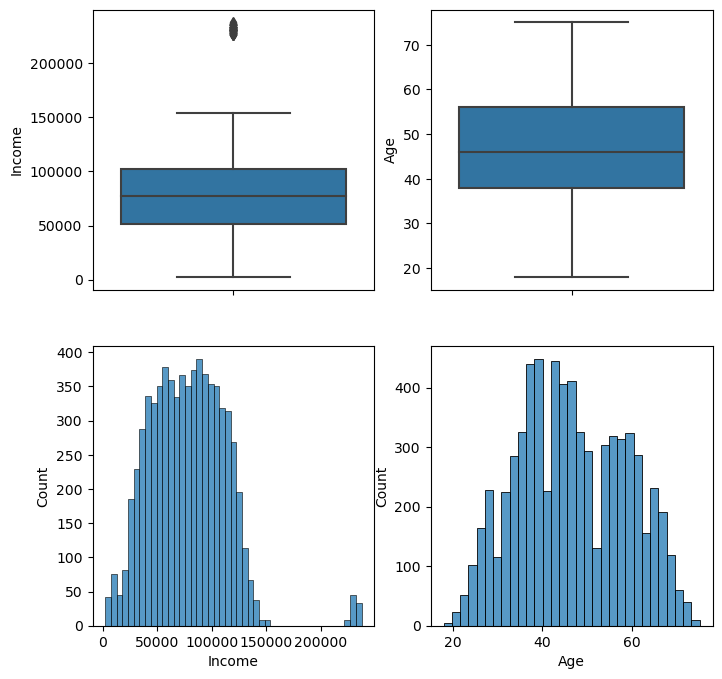

In [845]:
fig, axs = plt.subplots(2,2, figsize=(8, 8))
sns.boxplot(y=demo.Income, ax=axs[0,0])
sns.boxplot( y=demo.Age, ax=axs[0,1])
sns.histplot(data=demo.Income, ax=axs[1,0])
sns.histplot(data=demo.Age, ax=axs[1,1])

demo[demo.Income > 200000]

#### 3.3 Multivariate Analysis
<a id="6"></a> 

- Moderate correlation between Kid_Younger6 and Income

<AxesSubplot:>

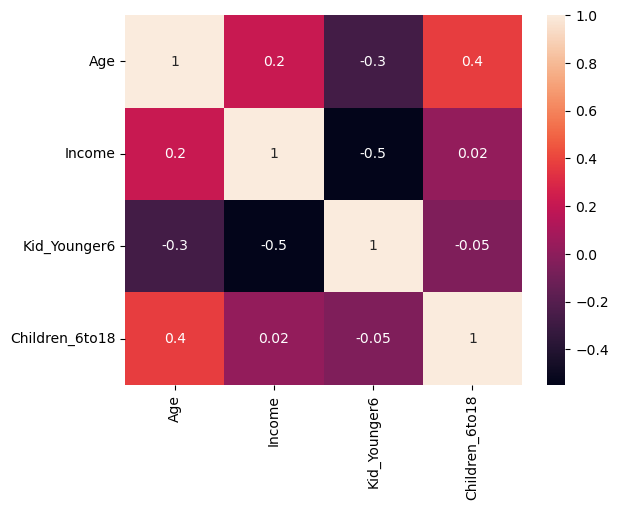

In [846]:
corr = demo[['Age','Income','Kid_Younger6','Children_6to18']].corr(method='spearman')
sns.heatmap(data=corr, annot=True, fmt = '.1g')

# 4. Firmo
<a id="7"></a> 

#### 4.1 Feature Engineering and Data Cleaning
<a id="8"></a> 

##### Duplicates and NA

- Recency - 23 
- MntDrinks - 28

In [847]:
# Check duplicates
sales[sales.duplicated()].shape[0] #were 8
sales.drop_duplicates(inplace=True)
# Check NA - 14 on Education
sales.isnull().sum()

Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
dtype: int64

##### Antiquity Creation - Antiquity
(how many year does the client has the company card)

In [848]:
sales[sales.Date_Adherence.apply(lambda x: isinstance(x, str))]                                         #16 cases of string 2/29/2022
sales.loc[sales.Date_Adherence.apply(lambda x: isinstance(x, str)), 'Date_Adherence'] = '3/01/2022'     # Converted to 3/01/2022 and to datetime object
sales['Date_Adherence'] = pd.to_datetime(sales['Date_Adherence'])
sales['Antiquity'] = datetime.today().year - sales['Date_Adherence'].dt.year

##### Frequency Creation - Freq
(number of purchases multichannel)

In [849]:
sales['Freq'] = sales[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', ]].sum(axis=1)

##### Total Spent Creation - Mnt_total

In [850]:
sales['Mnt_Total'] = sales[['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts','MntAdditionalRequests']].sum(axis=1)

##### Money spent on average per purchase - Avg_Ticket

In [851]:
sales['Avg_Ticket']= sales.Mnt_Total / sales.Freq

### 4.2 Univariate Analysis
<a id="9"></a> 

In [852]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,6977.0,49.235058,28.922688,0.000000,24.000000,49.000000,74.000000,99.0
MntMeat&Fish,7000.0,3079.523800,3370.377166,0.000000,250.000000,1820.000000,5070.000000,14980.0
MntEntries,7000.0,534.749429,787.846684,0.000000,40.000000,180.000000,680.000000,3980.0
MntVegan&Vegetarian,7000.0,2785.050786,3908.718244,0.000000,240.000000,1110.000000,3795.000000,25974.0
MntDrinks,6972.0,545.657544,805.149088,0.000000,40.000000,180.000000,700.000000,3980.0
MntDesserts,7000.0,540.656029,802.221866,0.000000,40.000000,180.000000,680.000000,3980.0
MntAdditionalRequests,7000.0,42.556186,49.650747,0.000000,9.000000,24.000000,57.000000,249.0
NumOfferPurchases,7000.0,2.448429,2.306968,0.000000,1.000000,2.000000,3.000000,16.0
NumAppPurchases,7000.0,6.015714,2.745537,0.000000,4.000000,6.000000,8.000000,13.0
NumTakeAwayPurchases,7000.0,3.834571,3.331142,0.000000,1.000000,3.000000,5.000000,24.0


In [853]:
#Avg_Ticket  with inf values because there's an inconsistence - 38 costumers who spent money but never went/orderd food from the restaurant
# If we default Freq to 1 - there's 2 high values (+/- 20k) that will skew Avg_Ticket
#Also 2 ppl that went only once but spent +/- 20.5k - will also skew Avg_Ticket

print(sales.loc[(sales.Freq == 0) & (sales.Mnt_Total > 0)].shape, '\n',
sales.loc[(sales.Freq == 1) & (sales.Mnt_Total > 20000)].shape)

(38, 18) 
 (2, 18)


In [854]:
sales.skew(numeric_only=True)[(sales.skew(numeric_only=True).values >1) | (sales.skew(numeric_only=True).values <-1)]


MntMeat&Fish             1.148862
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046308
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumTakeAwayPurchases     2.254158
NumAppVisitsMonth        1.005192
Complain                 9.709429
dtype: float64

In [855]:
sales.kurt(numeric_only=True)[(sales.kurt(numeric_only=True)>3) | (sales.kurt(numeric_only=True)<-3)]

MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.839256
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumTakeAwayPurchases      8.582138
NumAppVisitsMonth         4.992870
Complain                 92.299387
dtype: float64

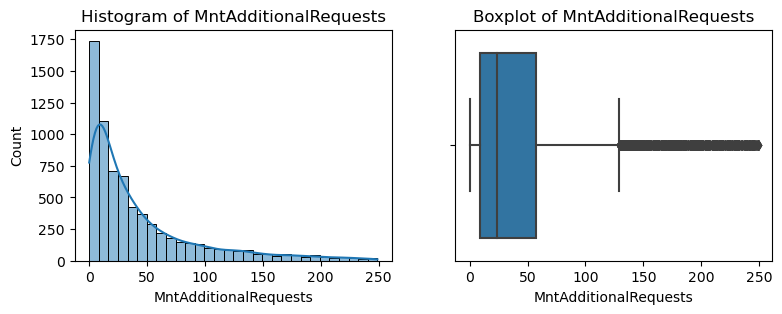

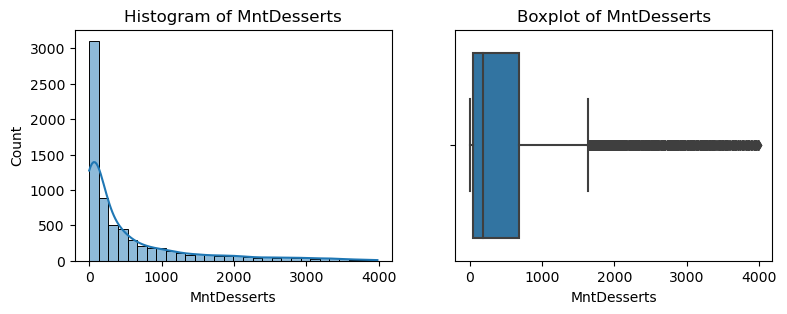

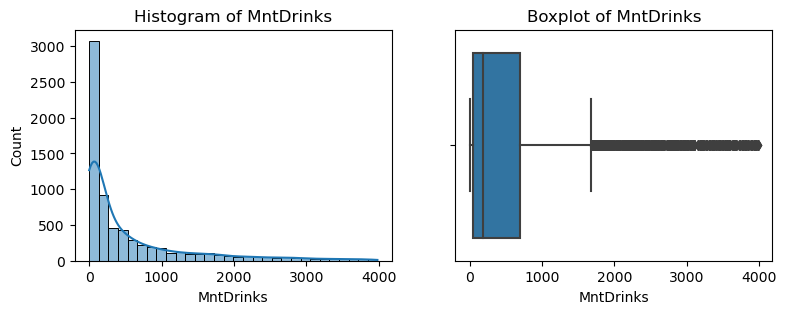

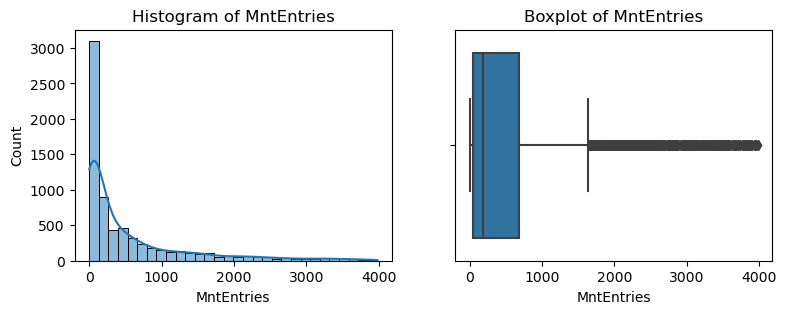

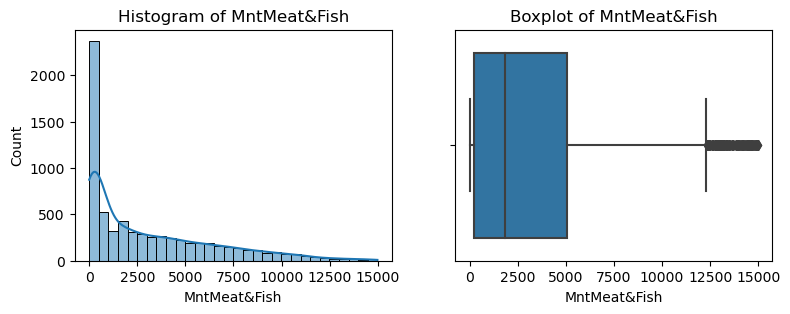

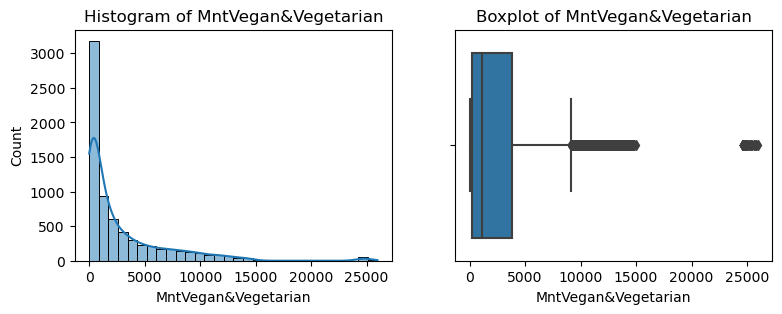

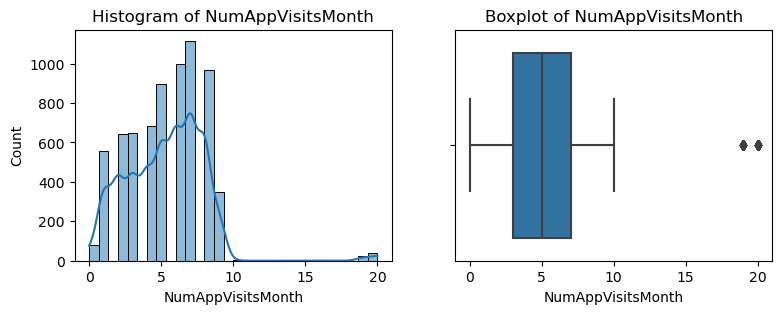

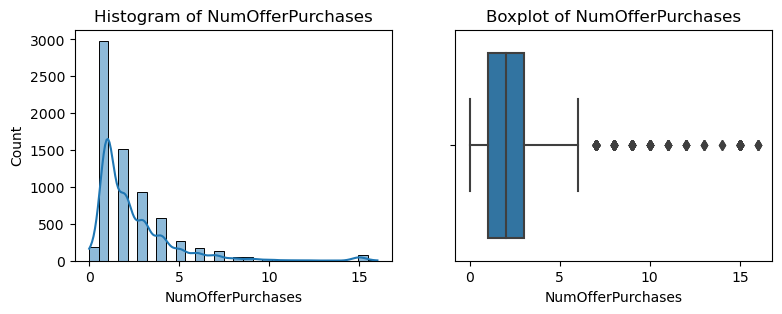

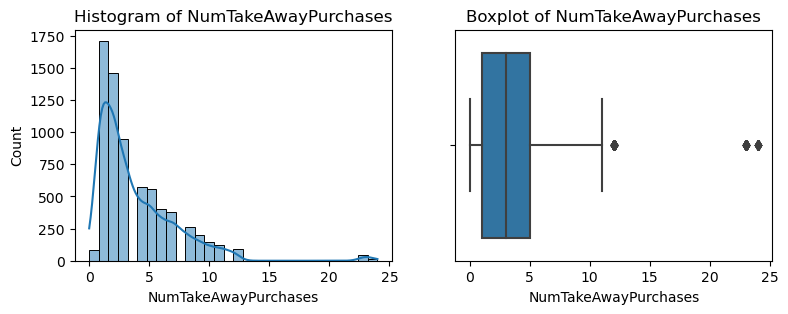

In [856]:
problematic = sales[[
'MntAdditionalRequests',
 'MntDesserts',
 'MntDrinks',
 'MntEntries',
 'MntMeat&Fish',
 'MntVegan&Vegetarian',
 'NumAppVisitsMonth',
 'NumOfferPurchases',
 'NumTakeAwayPurchases']]

for i in problematic:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    sns.histplot(ax=ax1, x=sales[i], bins=30,kde= True)
    sns.boxplot(ax=ax2, x=sales[i])
    ax1.set_title(f"Histogram of {i}")
    ax2.set_title(f"Boxplot of {i}")
    plt.show()


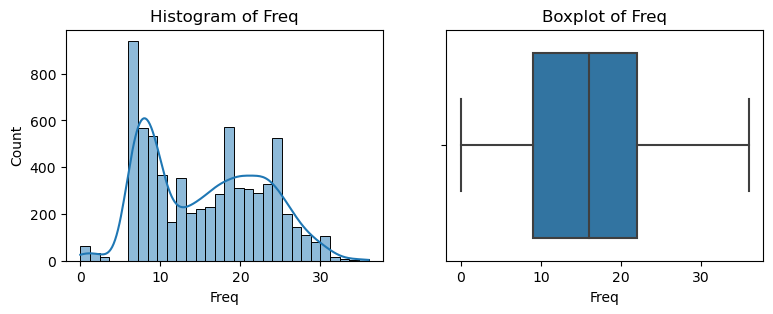

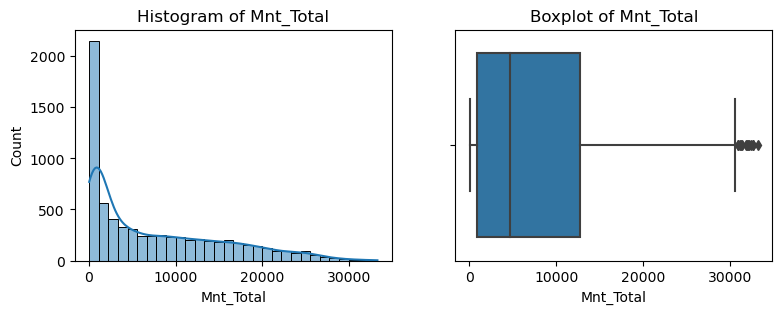

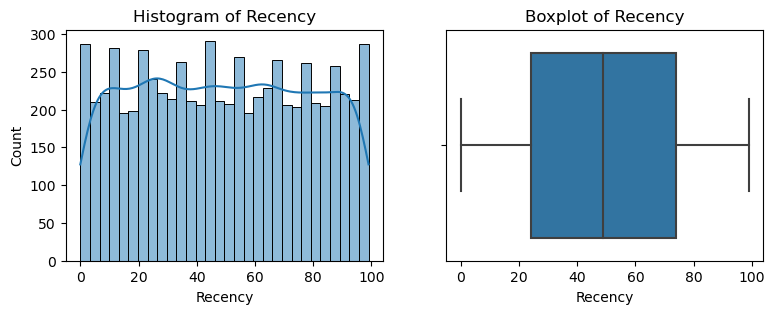

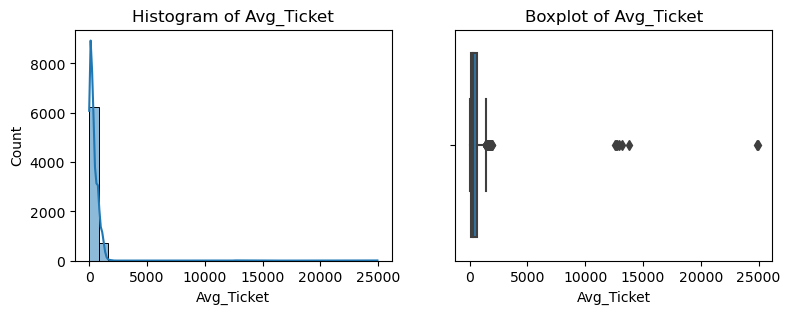

In [857]:
a = sales[[
'Freq',
'Mnt_Total',
'Recency',
'Avg_Ticket']]

for i in a:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    sns.histplot(ax=ax1, x=sales[i], bins=30,kde= True)
    sns.boxplot(ax=ax2, x=sales[i])
    ax1.set_title(f"Histogram of {i}")
    ax2.set_title(f"Boxplot of {i}")
    plt.show()

Conclusions:
- Freq, Mnt_Total, Avg_Ticket and Recency after outlier removal and maybe transformation (to help normalize) seem good indicators of costumer behavior for the model
- If we want to use the other variables to: cluster by type of food; cluster by type of channel used - we clearly have to apply a transformation technique (besides removing outliers)
* We can also try :
    - an aproach of ratios  mapping 1 to a costumer who as a higher ratio of meat by total purchases and 0 on the other food types (same with channel)
    - investigate a possible relation between beverage and dessert consumption and other behaviors...(thinking in marketing terms, like does it make sense to advertise or give drink coupon to try to rise sales in x group)
    - Investigate if there are ppl who visit the app many times but don't buy nothing - possible bottleneck - ux sucks? possible marketing campaign dedicated to those cases

### 4.3 Multivariate Analysis
<a id="9"></a> 

<AxesSubplot:>

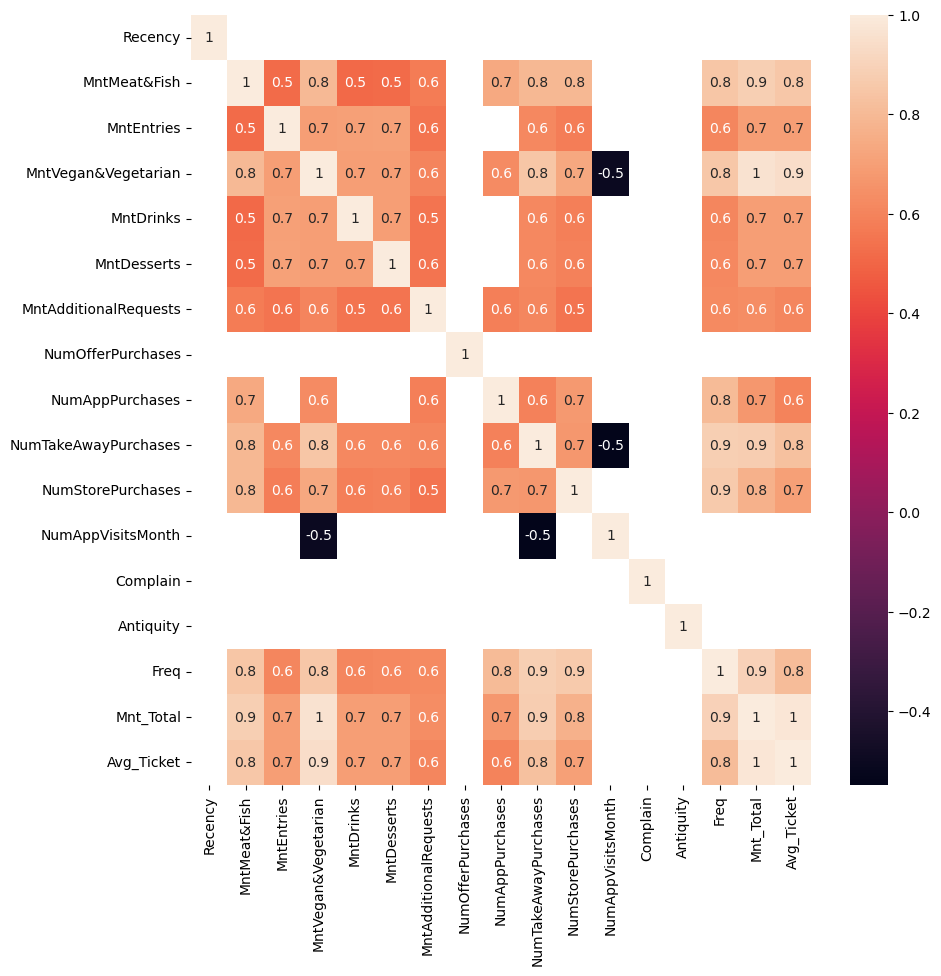

In [858]:
#Suggests that specific vars(by type of food and channel used) and sum total vars(Freq, Mnt_Total, Avg_Ticket) 
# are two different approaches and doesn't make sense when used together
plt.figure(figsize=(10,10))
sales_corr = sales.corr(method = 'spearman')[(sales.corr(method = 'spearman') > 0.5) | (sales.corr(method = 'spearman') < -0.5)]
sns.heatmap(sales_corr, annot=True, fmt = '.1g')

<AxesSubplot:>

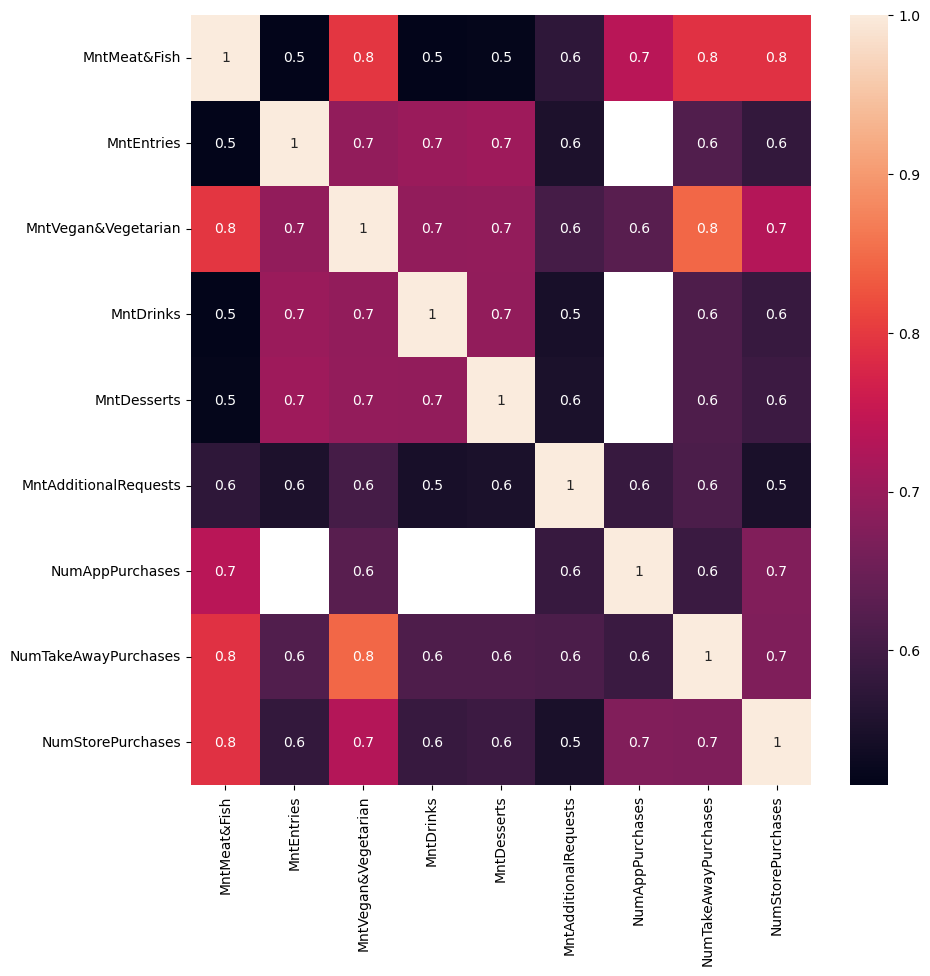

In [859]:
# Only corrs between "types of food" and channels
# High correlations all around
sales_foodtype_channel = sales[['MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases']]

plt.figure(figsize=(10,10))
sales_foodtype_channel_corr = sales_foodtype_channel.corr(method = 'spearman')[(sales_foodtype_channel.corr(method = 'spearman') > 0.5) | (sales_foodtype_channel.corr(method = 'spearman') < -0.5)]
sns.heatmap(sales_foodtype_channel_corr, annot=True, fmt = '.1g')

<AxesSubplot:>

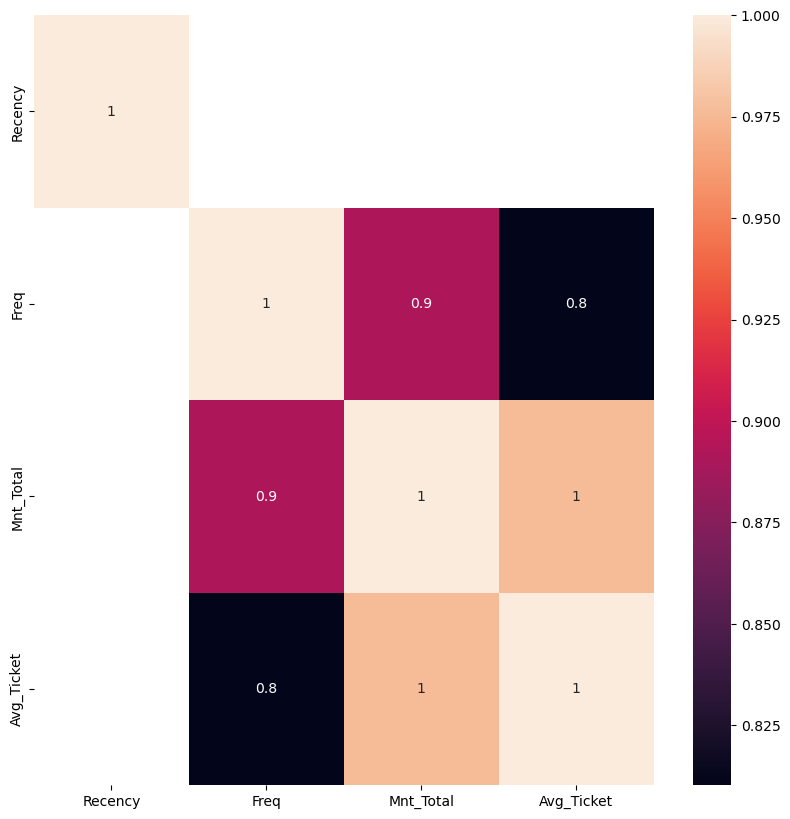

In [860]:
# Corrs between "sumed vars"
# Also high correlation - expected
sales_sums = sales[['Recency', 'Freq', 'Mnt_Total', 'Avg_Ticket']]

plt.figure(figsize=(10,10))
sales_sums_corr = sales_sums.corr(method = 'spearman')[(sales_sums.corr(method = 'spearman') > 0.5) | (sales_sums.corr(method = 'spearman') < -0.5)]
sns.heatmap(sales_sums_corr, annot=True, fmt = '.1g')

<AxesSubplot:xlabel='Mnt_Total', ylabel='Freq'>

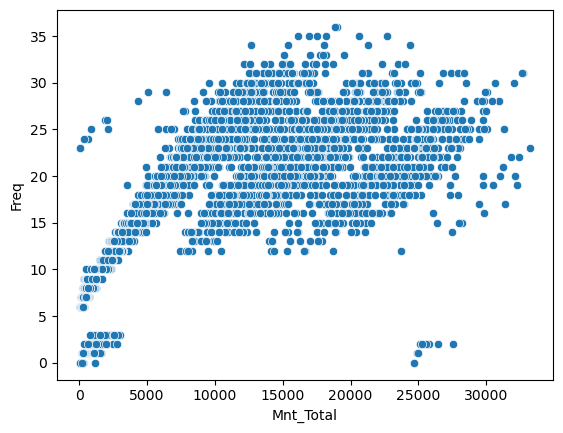

In [861]:
# Here's the clusters boys! *mic drop* i guess...
# Bit of trash around and outliers
#Maybe we should give DBSCAN a go bcs elipse shapes
sns.scatterplot( x=sales.Mnt_Total, y=sales.Freq)

In [862]:
# Way to test for multicollinearity - need to treat nulls first to check other vars ( if not above 5 we're good)
from statsmodels.stats.outliers_influence import variance_inflation_factor
sales_mc= sales[['MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian',  'MntDesserts',
       'MntAdditionalRequests']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = sales_mc.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(sales_mc.values, i)
                          for i in range(len(sales_mc.columns))]
vif_data


,feature,VIF
0,MntMeat&Fish,2.461759
1,MntEntries,2.407168
2,MntVegan&Vegetarian,2.261687
3,MntDesserts,2.419244
4,MntAdditionalRequests,2.036670


In [863]:
#Possible inconsistence, no visits on avg but at least 1 app purchase
sales[(sales.NumAppVisitsMonth == 0) & (sales.NumAppPurchases >0)].shape

(57, 18)

In [864]:
sales.drop(sales[(sales['NumAppVisitsMonth']==0 & (sales['NumAppPurchases'] >0 ))].index, inplace = True)
#Removing because there is no variables correlated that we can use knn to fill with

In [865]:
sales.drop(sales[(sales['Recency'].isna())].index, inplace = True)
#Removing because there is no variables correlated that we can use knn to fill with

In [866]:
sales.drop(sales[ (sales['Mnt_Total'] > 0) & (sales['Freq'] ==0)].index, inplace = True)

In [867]:
sales.query("Avg_Ticket == inf")

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Antiquity,Freq,Mnt_Total,Avg_Ticket
CustomerID,,,,,,,,,,,,,,,,,,


In [868]:
missing_drinks = sales[['MntDrinks','MntEntries','MntVegan&Vegetarian','MntDesserts']]

In [869]:
sales.query("Mnt_Total > 0 and (NumOfferPurchases == 0 and NumAppPurchases == 0 and NumTakeAwayPurchases == 0 and NumStorePurchases == 0)")

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Antiquity,Freq,Mnt_Total,Avg_Ticket
CustomerID,,,,,,,,,,,,,,,,,,


In [870]:
df = sales.merge(demo, how='left', on = 'CustomerID')

In [871]:
df['Education'].fillna(df['Education'].mode()[0], inplace=True)

In [872]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(missing_drinks) # this is an array
df_products = pd.DataFrame(array_impute, columns = missing_drinks.columns)

In [873]:
df['MntDrinks'] = df_products['MntDrinks'].values

In [874]:
df.isna().sum()

Date_Adherence            0
Recency                   0
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                 0
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
Antiquity                 0
Freq                      0
Mnt_Total                 0
Avg_Ticket                0
Name                      0
Birthyear                 0
Education                 0
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
Gender                    0
Age                       0
Education_bins           14
Marital_Status_2          0
Marital_Status_4          0
Income_bins               0
dtype: int64

In [875]:
rfm_df = df[['Recency', 'Freq', 'Mnt_Total']]
rfm_df.head()

,Recency,Freq,Mnt_Total
CustomerID,,,
11054,85.0,30,14582.0
17117,96.0,25,9743.0
31751,7.0,17,9968.0
12947,54.0,23,8503.0
11402,64.0,8,577.0


In [876]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Freq'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Mnt_Total'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\265771622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\265771622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['F_rank'] = rfm_df['Freq'].rank(ascending=True)
C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\265771622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Recency,Freq,Mnt_Total,R_rank_norm,F_rank_norm,M_rank_norm
CustomerID,,,,,,
11054,85.0,30,14582.0,14.447779,98.382514,98.375346
17117,96.0,25,9743.0,3.593647,88.495446,88.488999
31751,7.0,17,9968.0,92.841982,54.746812,54.742824
12947,54.0,23,8503.0,45.356071,80.510018,80.504153
11402,64.0,8,577.0,35.131377,18.615665,18.614309


In [877]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Freq,Mnt_Total,R_rank_norm,F_rank_norm,M_rank_norm
0.25,24.0,9.0,825.0,25.228720,26.586521,26.584584
0.50,49.0,16.0,4670.0,50.318378,51.023679,51.019962
0.75,74.0,22.0,12684.5,75.773988,76.080146,76.074603


In [878]:
RFM_Segment = rfm_df.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(R_Class, args=('Recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['Freq'].apply(FM_Class, args=('Freq',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['Mnt_Total'].apply(FM_Class, args=('Mnt_Total',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [879]:
df.rename(columns = {'MntMeat&Fish': 'MntMeatAndFish', 'MntVegan&Vegetarian': 'MntVeganAndVegetarian'}, inplace = True)

In [880]:
df.MntVeganAndVegetarian.loc[df.MntVeganAndVegetarian > 14985]  = 14985
df.Income.loc[df.Income > 200000]  = 153703
#Replacing the outliers by the max value that seems not beeing an outlier

C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\2768329429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MntVeganAndVegetarian.loc[df.MntVeganAndVegetarian > 14985]  = 14985
C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\2768329429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Income.loc[df.Income > 200000]  = 153703


In [881]:
df_2 = df.copy()

In [882]:
df['Income'].describe()

count      6863.000000
mean      76659.400189
std       31181.421495
min        3265.800000
25%       51655.500000
50%       76989.000000
75%      101322.500000
max      153703.000000
Name: Income, dtype: float64

In [883]:
df.query('Income > 150000')

,Date_Adherence,Recency,MntMeatAndFish,MntEntries,MntVeganAndVegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Antiquity,Freq,Mnt_Total,Avg_Ticket,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Gender,Age,Education_bins,Marital_Status_2,Marital_Status_4,Income_bins
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9521,2022-04-04,70.0,11.0,4,14985.0,4.0,0.0,0.1,0,0,23,0,1,0,1,23,24644.6,1071.504348,Miss Stephanie Bond,1973,Graduation,Single,153703.0,1,1,F,50,Medium,Alone,Single,High
14489,2021-09-26,52.0,20.0,42,14985.0,36.0,40.0,1.2,15,0,23,0,1,0,2,23,24812.7,1078.813043,Mr. Harry Berry,1986,Graduation,Divorced,153703.0,1,0,M,37,Medium,Alone,Divorced,High
14381,2020-09-12,45.0,785.0,24,561.0,24.0,48.0,8.4,0,1,0,1,1,0,3,2,1450.4,725.200000,Mr. Peter Rees,1984,Graduation,Together,153703.0,0,1,M,39,Medium,Together,Married,High
25241,2021-08-08,92.0,501.0,0,39.0,0.0,0.0,1.6,1,1,0,1,1,0,2,2,541.6,270.800000,Mr. Simon Wilson,1973,Phd,Divorced,153703.0,0,1,M,50,High,Alone,Divorced,High
31865,2021-11-07,76.0,54.0,0,14985.0,0.0,0.0,0.8,15,0,23,0,1,0,2,23,24681.8,1073.121739,Mr. Charles McGrath,1977,Phd,Married,153703.0,0,1,M,46,High,Together,Married,High
6320,2021-10-09,16.0,12350.0,420,11040.0,860.0,2600.0,86.0,0,9,8,9,2,0,2,26,27356.0,1052.153846,Mr. Kevin Lambert,1969,Master,Married,151072.0,0,0,M,54,High,Together,Married,Medium
18380,2020-09-16,83.0,20.0,8,14985.0,40.0,12.0,5.1,15,0,23,0,1,0,3,23,24757.1,1076.395652,Mr. Stewart Ball,1987,Graduation,Married,153703.0,1,0,M,36,Medium,Together,Married,High
15602,2021-04-28,90.0,599.0,0,57.0,0.0,0.0,0.6,1,1,0,1,1,0,2,2,656.6,328.300000,Miss Carol Hughes,1959,Graduation,Together,153703.0,0,1,F,64,Medium,Together,Married,High
19244,2021-03-18,39.0,312.0,146,14985.0,212.0,82.0,5.7,0,1,0,1,1,0,2,2,25803.2,12901.600000,Mr. Jacob Fraser,1962,Graduation,Single,153703.0,0,1,M,61,Medium,Alone,Single,High


In [884]:
df_food= df[["MntMeatAndFish","MntEntries","MntVeganAndVegetarian","MntDrinks","MntDesserts","MntAdditionalRequests", "Mnt_Total"]]
sum_mnts = df_food["MntMeatAndFish"].sum() + df_food["MntEntries"].sum() + df_food["MntVeganAndVegetarian"].sum() + df_food["MntDrinks"].sum() + df_food["MntDesserts"].sum()+ df_food["MntAdditionalRequests"].sum()

In [885]:
df['MntAdditionalRequests'].describe()
df_food['MntAdditionalRequests'].describe()

count    6863.000000
mean       42.983083
std        49.662563
min         0.000000
25%         9.000000
50%        24.000000
75%        58.000000
max       249.000000
Name: MntAdditionalRequests, dtype: float64

In [886]:
df_food["perc_MntMeatAndFish"] =((df_food['MntMeatAndFish']) / (df_food['MntMeatAndFish']+df_food['MntEntries'] + df_food['MntVeganAndVegetarian'] + df_food['MntDrinks'] + df_food['MntDesserts'] + df_food['MntAdditionalRequests'])) *100
df_food["perc_MntVeganAndVegetarian"] =((df_food['MntVeganAndVegetarian']) / (df_food['MntVeganAndVegetarian']+df_food['MntEntries'] + df_food['MntMeatAndFish'] + df_food['MntDrinks'] + df_food['MntDesserts'] + df_food['MntAdditionalRequests'])) *100
df_food["perc_MntEntries"] =((df_food['MntEntries']) / (df_food['MntEntries']+df_food['MntMeatAndFish'] + df_food['MntVeganAndVegetarian'] + df_food['MntDrinks'] + df_food['MntDesserts'] + df_food['MntAdditionalRequests'])) *100
df_food["perc_MntDrinks"] =((df_food['MntDrinks']) / (df_food['MntDrinks']+df_food['MntEntries'] + df_food['MntVeganAndVegetarian'] + df_food['MntMeatAndFish'] + df_food['MntDesserts'] + df_food['MntAdditionalRequests'])) *100
df_food["perc_MntDesserts"] =((df_food['MntDesserts']) / (df_food['MntDesserts']+df_food['MntEntries'] + df_food['MntVeganAndVegetarian'] + df_food['MntDrinks'] + df_food['MntMeatAndFish'] + df_food['MntAdditionalRequests'])) *100
df_food["perc_MntAdditionalRequests"] =((df_food['MntAdditionalRequests']) / (df_food['MntAdditionalRequests']+df_food['MntEntries'] + df_food['MntVeganAndVegetarian'] + df_food['MntDrinks'] + df_food['MntMeatAndFish'] + df_food['MntDesserts'])) *100

df_food

C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\1434380579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food["perc_MntMeatAndFish"] =((df_food['MntMeatAndFish']) / (df_food['MntMeatAndFish']+df_food['MntEntries'] + df_food['MntVeganAndVegetarian'] + df_food['MntDrinks'] + df_food['MntDesserts'] + df_food['MntAdditionalRequests'])) *100
C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\1434380579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food["perc_MntVeganAndVegetarian"] =((df_food[

,MntMeatAndFish,MntEntries,MntVeganAndVegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,Mnt_Total,perc_MntMeatAndFish,perc_MntVeganAndVegetarian,perc_MntEntries,perc_MntDrinks,perc_MntDesserts,perc_MntAdditionalRequests
CustomerID,,,,,,,,,,,,,
11054,7230.0,1820,3435.0,1600.0,440.0,57.0,14582.0,49.581676,23.556439,12.481141,10.972432,3.017419,0.390893
17117,5850.0,320,2745.0,500.0,320.0,8.0,9743.0,60.043108,28.174074,3.284409,5.131890,3.284409,0.082110
31751,8380.0,0,1560.0,0.0,0.0,28.0,9968.0,84.069021,15.650080,0.000000,0.000000,0.000000,0.280899
12947,5090.0,280,2355.0,140.0,560.0,78.0,8503.0,59.861225,27.696107,3.292955,1.646478,6.585911,0.917323
11402,330.0,0,240.0,0.0,0.0,7.0,577.0,57.192374,41.594454,0.000000,0.000000,0.000000,1.213172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23699,290.0,20,180.0,0.0,40.0,4.0,534.0,54.307116,33.707865,3.745318,0.000000,7.490637,0.749064
23255,230.0,80,525.0,20.0,80.0,23.0,958.0,24.008351,54.801670,8.350731,2.087683,8.350731,2.400835
5798,3050.0,2460,3840.0,1800.0,980.0,107.0,12237.0,24.924410,31.380240,20.102966,14.709488,8.008499,0.874397


In [887]:
df_food['MntMeatAndFish_ranked'] = df_food['MntMeatAndFish'].rank(ascending=True)
df_food['MntEntries_ranked'] = df_food['MntEntries'].rank(ascending=True)
df_food['MntVeganAndVegetarian_ranked'] = df_food['MntVeganAndVegetarian'].rank(ascending=True)
df_food['MntDrinks_ranked'] = df_food['MntDrinks'].rank(ascending=True)
df_food['MntDesserts_ranked'] = df_food['MntDesserts'].rank(ascending=True)
df_food['MntAdditionalRequests_ranked'] = df_food['MntAdditionalRequests'].rank(ascending=True)

# normalizing the rank of the customers
df_food['MntMeatAndFish_norm'] = (df_food['MntMeatAndFish_ranked']/df_food['MntMeatAndFish_ranked'].max())*100
df_food['MntEntries_norm'] = (df_food['MntEntries_ranked']/df_food['MntEntries_ranked'].max())*100
df_food['MntVeganAndVegetarian_norm'] = (df_food['MntVeganAndVegetarian_ranked']/df_food['MntVeganAndVegetarian_ranked'].max())*100
df_food['MntDrinks_norm'] = (df_food['MntDrinks_ranked']/df_food['MntDrinks_ranked'].max())*100
df_food['MntDesserts_norm'] = (df_food['MntDesserts_ranked']/df_food['MntDesserts_ranked'].max())*100
df_food['MntAdditionalRequests_norm'] = (df_food['MntAdditionalRequests_ranked']/df_food['MntAdditionalRequests_ranked'].max())*100
 

df_food.head()

C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\3571794997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food['MntMeatAndFish_ranked'] = df_food['MntMeatAndFish'].rank(ascending=True)
C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\3571794997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food['MntEntries_ranked'] = df_food['MntEntries'].rank(ascending=True)
C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\3571794997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,MntMeatAndFish,MntEntries,MntVeganAndVegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,Mnt_Total,perc_MntMeatAndFish,perc_MntVeganAndVegetarian,perc_MntEntries,perc_MntDrinks,perc_MntDesserts,perc_MntAdditionalRequests,MntMeatAndFish_ranked,MntEntries_ranked,MntVeganAndVegetarian_ranked,MntDrinks_ranked,MntDesserts_ranked,MntAdditionalRequests_ranked,MntMeatAndFish_norm,MntEntries_norm,MntVeganAndVegetarian_norm,MntDrinks_norm,MntDesserts_norm,MntAdditionalRequests_norm
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,
11054,7230.0,1820,3435.0,1600.0,440.0,57.0,14582.0,49.581676,23.556439,12.481141,10.972432,3.017419,0.390893,5889.0,6270.5,5044.5,6087.0,4572.0,5123.5,85.807956,91.373406,73.663843,88.705917,66.627805,74.675703
17117,5850.0,320,2745.0,500.0,320.0,8.0,9743.0,60.043108,28.174074,3.284409,5.131890,3.284409,0.082110,5422.5,4098.0,4720.0,4697.5,4130.5,1584.0,79.010637,59.715847,68.925234,68.456718,60.193821,23.087014
31751,8380.0,0,1560.0,0.0,0.0,28.0,9968.0,84.069021,15.650080,0.000000,0.000000,0.000000,0.280899,6183.5,572.0,3879.0,580.0,575.0,3723.5,90.099082,8.335155,56.644276,8.452346,8.379481,54.270515
12947,5090.0,280,2355.0,140.0,560.0,78.0,8503.0,59.861225,27.696107,3.292955,1.646478,6.585911,0.917323,5132.5,3938.5,4528.5,3095.0,4895.5,5646.0,74.785079,57.391621,66.128797,45.103468,71.342174,82.291211
11402,330.0,0,240.0,0.0,0.0,7.0,577.0,57.192374,41.594454,0.000000,0.000000,0.000000,1.213172,1941.0,572.0,1679.0,580.0,575.0,1425.5,28.282092,8.335155,24.518107,8.452346,8.379481,20.776855


In [888]:
weight_MntMeatAndFish = ((df["MntMeatAndFish"].sum() / sum_mnts) *100).round(6)
weight_MntEntries = ((df["MntEntries"].sum() / sum_mnts) *100).round(6)
weight_MntVeganAndVegetarian = ((df["MntVeganAndVegetarian"].sum() / sum_mnts) *100).round(6)
weight_MntDrinks = ((df["MntDrinks"].sum() / sum_mnts) *100).round(6)
weight_MntDesserts = ((df["MntDesserts"].sum() / sum_mnts) *100).round(6)
weight_MntAdditionalRequests = ((df["MntAdditionalRequests"].sum() / sum_mnts) *100).round(6)
print(weight_MntMeatAndFish)
print(weight_MntEntries)
print(weight_MntVeganAndVegetarian)
print(weight_MntDrinks)
print(weight_MntDesserts)
print(weight_MntAdditionalRequests)
suma = weight_MntMeatAndFish + weight_MntEntries + weight_MntVeganAndVegetarian + weight_MntDrinks + weight_MntDesserts + weight_MntAdditionalRequests
suma

41.900904
7.228938
35.585114
7.390183
7.317308
0.577554


100.00000100000001

In [889]:
df_food['Score'] = (((df_food['MntMeatAndFish_norm']/100)* 0.41900904) + ((df_food['MntEntries_norm']/100)*0.07228938) + ((df_food['MntVeganAndVegetarian_norm']/100)*0.35585114) + ((df_food['MntDrinks_norm']/100)*0.07390183) +((df_food['MntDesserts_norm']/100)*0.07317308)+((df_food['MntAdditionalRequests_norm']/100)*0.00577554)).round(2)

C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\1022623454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food['Score'] = (((df_food['MntMeatAndFish_norm']/100)* 0.41900904) + ((df_food['MntEntries_norm']/100)*0.07228938) + ((df_food['MntVeganAndVegetarian_norm']/100)*0.35585114) + ((df_food['MntDrinks_norm']/100)*0.07390183) +((df_food['MntDesserts_norm']/100)*0.07317308)+((df_food['MntAdditionalRequests_norm']/100)*0.00577554)).round(2)


In [890]:
df_food["Customer_segment"] = np.where(df_food['Score'] >
                                      0.80, "Top Customers",
                                      (np.where(
                                        df_food['Score'] > 0.6,
                                        "High value Customer",
                                        (np.where(
                                            df_food['Score'] > 0.4,
                                             "Medium Value Customer",
                                                 np.where(df_food['Score'] > 0.2,
                                                    'Low Value Customers', 'Lost Customers'))))))

C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\125849484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food["Customer_segment"] = np.where(df_food['Score'] >


In [891]:
df_food["Customer_segment"].value_counts()

High value Customer      1791
Low Value Customers      1471
Medium Value Customer    1361
Lost Customers           1227
Top Customers            1013
Name: Customer_segment, dtype: int64

In [892]:
test = df_food.copy()
test2 = test[['perc_MntMeatAndFish', 'perc_MntVeganAndVegetarian', 'perc_MntEntries', 'perc_MntDrinks', 'perc_MntDesserts','perc_MntAdditionalRequests', 'Customer_segment', 'Score']]
test2.sort_values(by= ['Score'], inplace = True)
test3 = test2.groupby(['Customer_segment']).mean()
test3.sort_values(by= ['Score'], inplace = True)
test3

C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\181046084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.sort_values(by= ['Score'], inplace = True)


,perc_MntMeatAndFish,perc_MntVeganAndVegetarian,perc_MntEntries,perc_MntDrinks,perc_MntDesserts,perc_MntAdditionalRequests,Score
Customer_segment,,,,,,,
Lost Customers,31.890907,30.171653,12.373378,12.282732,11.346807,1.934524,0.141100
Low Value Customers,40.520714,32.359298,8.529407,8.511462,8.632694,1.446424,0.291992
Medium Value Customer,48.998411,29.037950,6.835511,7.020440,7.017297,1.090392,0.503666
High value Customer,43.388438,32.694223,7.710810,7.920693,7.656633,0.629203,0.710050
Top Customers,40.602338,38.853587,6.640498,6.705068,6.854879,0.343630,0.863623


#### By looking into this values we can infere some things:
##### Our "worst costumers" are costumers that tried our restaurant and did tried again, for that reason they have the percentages of amout spent more spread out through the diferent offers. They are the group with higher percentage of aditional requests, whitch make sense, because they did not got happy with the "regular" requests and tried to fill that gap with the aditional request. As we go up in the scale of value of costumer we see that the percentage of adictional requests decreases, because we are talking about costumers that are pleased with our service.

###### We can see that our population of costumers are predominatly "Animal eaters", the medium value are the most and the top costumers is where this gap is lower, having almost the same distribution.
###### We can't see that MntEntries, MntDrinks or MntDesserts are much more prevalent in any of the groups

In [893]:
df_food["Customer_Category_Lovers"] = np.where(df_food['perc_MntMeatAndFish'] > df_food['perc_MntMeatAndFish'].quantile(q=0.75),
                                     "MeatAndFish_Lover", 
                                     np.where(df_food['perc_MntVeganAndVegetarian'] > df_food['perc_MntVeganAndVegetarian'].quantile(q=0.75),
                                        "VeganAndVegetarian_Lover", 
                                        np.where(df_food['perc_MntEntries'] > df_food['perc_MntEntries'].quantile(q=0.75),
                                        "Entries_Lover",
                                        np.where(df_food['perc_MntDrinks'] > df_food['perc_MntDrinks'].quantile(q=0.75),
                                        "Drinks_Lover",
                                        np.where(df_food['perc_MntDesserts'] > df_food['perc_MntDesserts'].quantile(q=0.75),
                                        "Desserts_Lover", "Not_Lover")))))

C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\830513220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food["Customer_Category_Lovers"] = np.where(df_food['perc_MntMeatAndFish'] > df_food['perc_MntMeatAndFish'].quantile(q=0.75),


In [894]:
df_food["Customer_Category_Spared"] = np.where(df_food['perc_MntMeatAndFish'] < df_food['perc_MntMeatAndFish'].quantile(q=0.25),
                                     "MeatAndFish_Spared", 
                                     np.where(df_food['perc_MntVeganAndVegetarian'] < df_food['perc_MntVeganAndVegetarian'].quantile(q=0.25),
                                        "VeganAndVegetarian_Spared", 
                                        np.where(df_food['perc_MntEntries'] < df_food['perc_MntEntries'].quantile(q=0.25),
                                        "Entries_Spared",
                                        np.where(df_food['perc_MntDrinks'] < df_food['perc_MntDrinks'].quantile(q=0.25),
                                        "Drinks_Spared",
                                        np.where(df_food['perc_MntDesserts'] < df_food['perc_MntDesserts'].quantile(q=0.25),
                                        "Desserts_Spared", "Not_Spared")))))

C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\1294777839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food["Customer_Category_Spared"] = np.where(df_food['perc_MntMeatAndFish'] < df_food['perc_MntMeatAndFish'].quantile(q=0.25),


In [895]:
df_food = df_food.merge(df[['Recency', 'Freq']], how='left', on = 'CustomerID')
df_food.head(2)

,MntMeatAndFish,MntEntries,MntVeganAndVegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,Mnt_Total,perc_MntMeatAndFish,perc_MntVeganAndVegetarian,perc_MntEntries,perc_MntDrinks,perc_MntDesserts,perc_MntAdditionalRequests,MntMeatAndFish_ranked,MntEntries_ranked,MntVeganAndVegetarian_ranked,MntDrinks_ranked,MntDesserts_ranked,MntAdditionalRequests_ranked,MntMeatAndFish_norm,MntEntries_norm,MntVeganAndVegetarian_norm,MntDrinks_norm,MntDesserts_norm,MntAdditionalRequests_norm,Score,Customer_segment,Customer_Category_Lovers,Customer_Category_Spared,Recency,Freq
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11054,7230.0,1820,3435.0,1600.0,440.0,57.0,14582.0,49.581676,23.556439,12.481141,10.972432,3.017419,0.390893,5889.0,6270.5,5044.5,6087.0,4572.0,5123.5,85.807956,91.373406,73.663843,88.705917,66.627805,74.675703,0.81,Top Customers,Entries_Lover,Not_Spared,85.0,30
17117,5850.0,320,2745.0,500.0,320.0,8.0,9743.0,60.043108,28.174074,3.284409,5.131890,3.284409,0.082110,5422.5,4098.0,4720.0,4697.5,4130.5,1584.0,79.010637,59.715847,68.925234,68.456718,60.193821,23.087014,0.72,High value Customer,MeatAndFish_Lover,Not_Spared,96.0,25


In [896]:
#quantiles_df_food = df_food.quantile(q=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
#quantiles_df_food

In [897]:
# Consumer_Segment = df.copy()
# #Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
# def R_Class(x,p,d):
#     if x <= d[p][0.25]:
#         return 4
#     elif x <= d[p][0.50]:
#         return 3
#     elif x <= d[p][0.75]: 
#         return 2
#     else:
#         return 1
    
# # Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
# def FM_Class(x,p,d):
#     if x <= d[p][0.1]:
#         return 1
#     elif x <= d[p][0.2]:
#         return 2
#     elif x <= d[p][0.3]:
#         return 3
#     elif x <= d[p][0.4]:
#         return 4
#     elif x <= d[p][0.5]:
#         return 5
#     elif x <= d[p][0.6]:
#         return 6
#     elif x <= d[p][0.7]:
#         return 7
#     elif x <= d[p][0.8]:
#         return 8
#     elif x <= d[p][0.9]: 
#         return 9
#     else:
#         return 10
    

# Consumer_Segment['MntMeatAndFish_Quartile'] = Consumer_Segment['MntMeatAndFish'].apply(FM_Class, args=('MntMeatAndFish',quantiles_df_food,))
# Consumer_Segment['MntEntries_Quartile'] = Consumer_Segment['MntEntries'].apply(FM_Class, args=('MntEntries',quantiles_df_food,))
# Consumer_Segment['MntVeganAndVegetarian_Quartile'] = Consumer_Segment['MntVeganAndVegetarian'].apply(FM_Class, args=('MntVeganAndVegetarian',quantiles_df_food,))
# Consumer_Segment['MntDrinks_Quartile'] = Consumer_Segment['MntDrinks'].apply(FM_Class, args=('MntDrinks',quantiles_df_food,))
# Consumer_Segment['MntDesserts_Quartile'] = Consumer_Segment['MntDesserts'].apply(FM_Class, args=('MntDesserts',quantiles_df_food,))
# Consumer_Segment['MntAdditionalRequests_Quartile'] = Consumer_Segment['MntAdditionalRequests'].apply(FM_Class, args=('MntAdditionalRequests',quantiles_df_food,))
# Consumer_Segment['Consumer_Segment'] = Consumer_Segment.MntMeatAndFish_Quartile.map(str) \
#                             + Consumer_Segment.MntEntries_Quartile.map(str) \
#                             + Consumer_Segment.MntVeganAndVegetarian_Quartile.map(str)\
#                             + Consumer_Segment.MntDrinks_Quartile.map(str)\
#                             + Consumer_Segment.MntDesserts_Quartile.map(str) \
#                             + Consumer_Segment.MntAdditionalRequests_Quartile.map(str)

In [898]:
quantiles_df_food = df_food.quantile(q=[0.25,0.5,0.75])
quantiles_df_food

,MntMeatAndFish,MntEntries,MntVeganAndVegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,Mnt_Total,perc_MntMeatAndFish,perc_MntVeganAndVegetarian,perc_MntEntries,perc_MntDrinks,perc_MntDesserts,perc_MntAdditionalRequests,MntMeatAndFish_ranked,MntEntries_ranked,MntVeganAndVegetarian_ranked,MntDrinks_ranked,MntDesserts_ranked,MntAdditionalRequests_ranked,MntMeatAndFish_norm,MntEntries_norm,MntVeganAndVegetarian_norm,MntDrinks_norm,MntDesserts_norm,MntAdditionalRequests_norm,Score,Recency,Freq
0.25,260.0,40.0,240.0,40.0,40.0,9.0,825.0,23.505061,21.618454,1.688592,1.654431,1.663399,0.285978,1721.5,1819.5,1679.0,1824.5,1830.0,1735.5,25.083783,26.513661,24.518107,26.588458,26.668610,25.295146,0.26,24.0,9.0
0.50,1870.0,180.0,1110.0,180.0,180.0,24.0,4670.0,39.435798,31.380753,5.547850,5.626911,5.469522,0.678961,3436.0,3427.5,3422.5,3423.5,3417.0,3399.5,50.065569,49.945355,49.978096,49.890702,49.795978,49.548171,0.51,49.0,16.0
0.75,5120.0,680.0,3720.0,700.0,680.0,58.0,12684.5,58.317800,41.671887,11.861898,12.170973,12.048193,1.508932,5147.0,5137.0,5147.0,5144.0,5139.0,5165.0,74.996357,74.856102,75.160631,74.963567,74.890702,75.280571,0.73,74.0,22.0


In [899]:
rfm_df = df.copy()
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Freq'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Mnt_Total'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head(2)

,Date_Adherence,Recency,MntMeatAndFish,MntEntries,MntVeganAndVegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Antiquity,Freq,Mnt_Total,Avg_Ticket,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Gender,Age,Education_bins,Marital_Status_2,Marital_Status_4,Income_bins,R_rank_norm,F_rank_norm,M_rank_norm
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11054,2021-03-18,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0,2,30,14582.0,486.066667,Mr. Leonard Parr,1963,Graduation,Single,107153.0,0,1,M,60,Medium,Alone,Single,Medium,14.447779,98.382514,98.375346
17117,2021-03-01,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0,2,25,9743.0,389.720000,Mr. Peter Duncan,1980,Master,Married,96725.0,0,1,M,43,High,Together,Married,Medium,3.593647,88.495446,88.488999


In [900]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['RFM_Score']].head(2)

,RFM_Score
CustomerID,
11054,4.29
17117,3.79


In [901]:
rfm_df["Customer_segment_2"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(rfm_df['RFM_Score'] > 3,
                                          "Medium Value Customer",
                                             np.where(rfm_df['RFM_Score'] > 1.6,
                                                'Low Value Customers', 'Lost Customers'))))))
rfm_df[['RFM_Score', 'Customer_segment_2']].head(20)

,RFM_Score,Customer_segment_2
CustomerID,,
11054,4.29,High value Customer
17117,3.79,Medium Value Customer
31751,3.02,Medium Value Customer
12947,3.76,Medium Value Customer
11402,1.05,Lost Customers
34958,2.33,Low Value Customers
16862,4.32,High value Customer
32981,2.27,Low Value Customers
22769,0.69,Lost Customers


#### rfm score
##### 4.5 > Top Customer
##### 4.5 > 4 : High Value Customer
##### 4 > 3 : Medium value customer
##### 3 > 1.6 : Low-value customer
##### <1.6 :Lost Customer

In [902]:
df_food = df_food.merge(rfm_df[['R_rank_norm', 'F_rank_norm', 'M_rank_norm','RFM_Score','Customer_segment_2']], how='left', on = 'CustomerID')
df_food.head(2)

,MntMeatAndFish,MntEntries,MntVeganAndVegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,Mnt_Total,perc_MntMeatAndFish,perc_MntVeganAndVegetarian,perc_MntEntries,perc_MntDrinks,perc_MntDesserts,perc_MntAdditionalRequests,MntMeatAndFish_ranked,MntEntries_ranked,MntVeganAndVegetarian_ranked,MntDrinks_ranked,MntDesserts_ranked,MntAdditionalRequests_ranked,MntMeatAndFish_norm,MntEntries_norm,MntVeganAndVegetarian_norm,MntDrinks_norm,MntDesserts_norm,MntAdditionalRequests_norm,Score,Customer_segment,Customer_Category_Lovers,Customer_Category_Spared,Recency,Freq,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment_2
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11054,7230.0,1820,3435.0,1600.0,440.0,57.0,14582.0,49.581676,23.556439,12.481141,10.972432,3.017419,0.390893,5889.0,6270.5,5044.5,6087.0,4572.0,5123.5,85.807956,91.373406,73.663843,88.705917,66.627805,74.675703,0.81,Top Customers,Entries_Lover,Not_Spared,85.0,30,14.45,98.38,98.38,4.29,High value Customer
17117,5850.0,320,2745.0,500.0,320.0,8.0,9743.0,60.043108,28.174074,3.284409,5.131890,3.284409,0.082110,5422.5,4098.0,4720.0,4697.5,4130.5,1584.0,79.010637,59.715847,68.925234,68.456718,60.193821,23.087014,0.72,High value Customer,MeatAndFish_Lover,Not_Spared,96.0,25,3.59,88.50,88.49,3.79,Medium Value Customer


In [903]:
data = df_food.copy()
data2 = data[['perc_MntMeatAndFish', 'perc_MntVeganAndVegetarian', 'perc_MntEntries', 'perc_MntDrinks', 'perc_MntDesserts','perc_MntAdditionalRequests', 'Customer_segment', 'Score', 'RFM_Score','Customer_segment_2']]
data2.sort_values(by= ['RFM_Score'], inplace = True)
data3 = data2.groupby(['Customer_segment_2']).mean()
data3.sort_values(by= ['RFM_Score'], inplace = True)
data3

C:\Users\gonca\AppData\Local\Temp\ipykernel_18496\1850225155.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.sort_values(by= ['RFM_Score'], inplace = True)


,perc_MntMeatAndFish,perc_MntVeganAndVegetarian,perc_MntEntries,perc_MntDrinks,perc_MntDesserts,perc_MntAdditionalRequests,Score,RFM_Score
Customer_segment_2,,,,,,,,
Lost Customers,33.295324,32.617884,11.017858,10.844837,10.475028,1.749069,0.192721,0.980513
Low Value Customers,44.779268,30.495447,7.764081,7.968103,7.876365,1.116736,0.494896,2.314767
Medium Value Customer,44.904416,33.531579,6.961633,7.077489,6.932965,0.591918,0.716707,3.495098
High value Customer,44.018886,34.318773,6.908302,7.231300,7.008849,0.513890,0.770371,4.247573
Top Customers,45.380173,33.496934,6.789597,6.818782,7.033522,0.480991,0.788889,4.674957


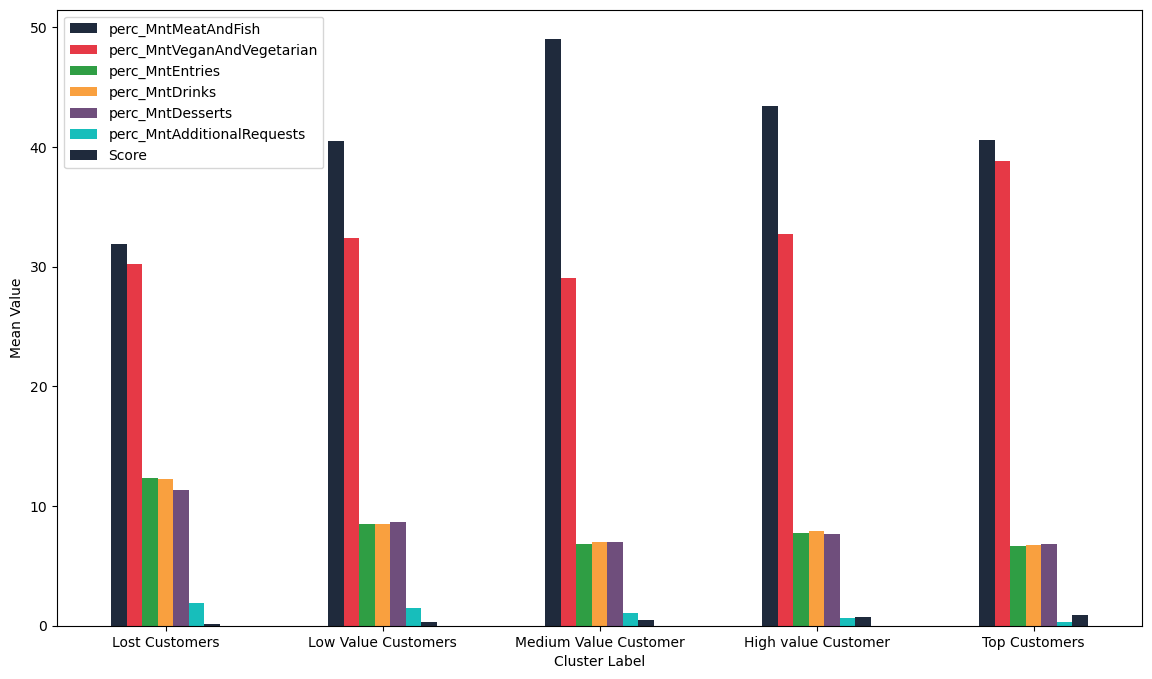

In [955]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_nv_k4_ = test3.plot.bar(figsize=(14,8), rot=0, color=colors)

ax_nv_k4_.set_xlabel('Cluster Label')
ax_nv_k4_.set_ylabel('Mean Value')

 
plt.show()

plt.show()

In [905]:
df_food['Customer_segment'].value_counts()

High value Customer      1791
Low Value Customers      1471
Medium Value Customer    1361
Lost Customers           1227
Top Customers            1013
Name: Customer_segment, dtype: int64

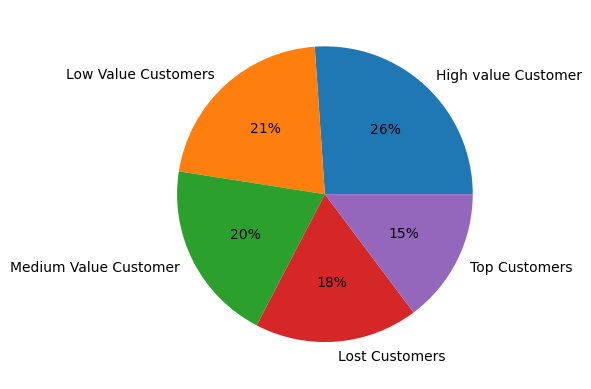

In [906]:
df_food.sort_values(by= ['Customer_segment'], inplace = True)

plt.pie(df_food.Customer_segment.value_counts(),
        labels=df_food.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [907]:
print(df_food["perc_MntEntries"].describe())
print(df_food["perc_MntMeatAndFish"].describe())
print(df_food["perc_MntVeganAndVegetarian"].describe())
print(df_food["perc_MntDrinks"].describe())
print(df_food["perc_MntDesserts"].describe())


count    6863.000000
mean        8.388301
std         9.108640
min         0.000000
25%         1.688592
50%         5.547850
75%        11.861898
max        73.800738
Name: perc_MntEntries, dtype: float64
count    6863.000000
mean       41.419468
std        23.173643
min         0.000000
25%        23.505061
50%        39.435798
75%        58.317800
max        98.461169
Name: perc_MntMeatAndFish, dtype: float64
count    6863.000000
mean       32.355505
std        14.363765
min         0.000000
25%        21.618454
50%        31.380753
75%        41.671887
max        99.946642
Name: perc_MntVeganAndVegetarian, dtype: float64
count    6863.000000
mean        8.469224
std         9.277100
min         0.000000
25%         1.654431
50%         5.626911
75%        12.170973
max        68.571429
Name: perc_MntDrinks, dtype: float64
count    6863.000000
mean        8.280459
std         8.953834
min         0.000000
25%         1.663399
50%         5.469522
75%        12.048193
max        83.8

<AxesSubplot:ylabel='perc_MntDesserts'>

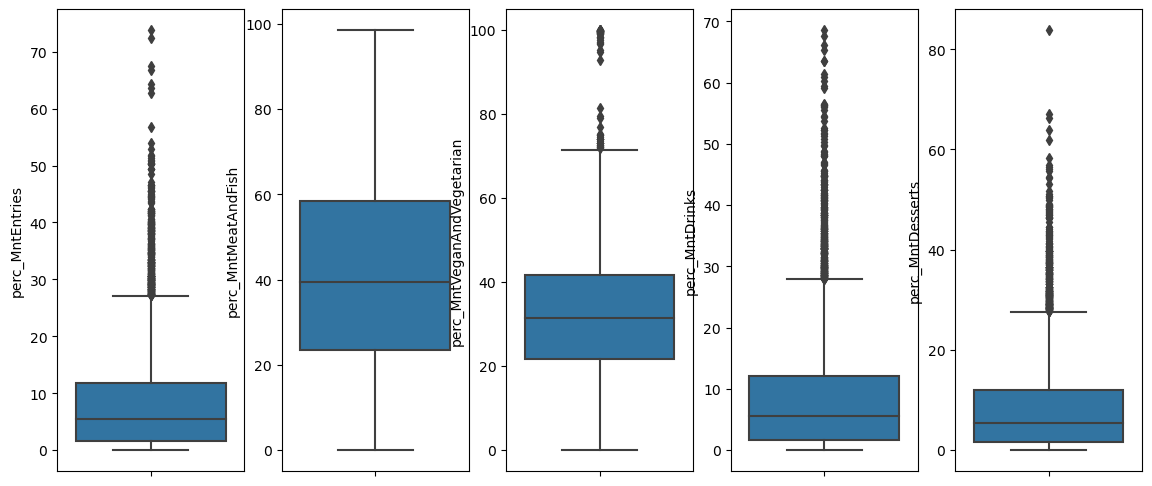

In [908]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (14,6))
sns.boxplot(ax = ax1, data = df_food, y = 'perc_MntEntries')
sns.boxplot(ax = ax2, data = df_food, y = 'perc_MntMeatAndFish')
sns.boxplot(ax = ax3, data = df_food, y = 'perc_MntVeganAndVegetarian')
sns.boxplot(ax = ax4, data = df_food, y = 'perc_MntDrinks')
sns.boxplot(ax = ax5, data = df_food, y = 'perc_MntDesserts')

#### He have right skewed distributions on entries, drinks and desserts with some outliers that have spent more than 50/60% on this options.
#### We have fairly normal distributions on meat and fish and vegan and vegetarian.

In [909]:
#Some considerations
df_food.query('perc_MntDrinks > 60')

,MntMeatAndFish,MntEntries,MntVeganAndVegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,Mnt_Total,perc_MntMeatAndFish,perc_MntVeganAndVegetarian,perc_MntEntries,perc_MntDrinks,perc_MntDesserts,perc_MntAdditionalRequests,MntMeatAndFish_ranked,MntEntries_ranked,MntVeganAndVegetarian_ranked,MntDrinks_ranked,MntDesserts_ranked,MntAdditionalRequests_ranked,MntMeatAndFish_norm,MntEntries_norm,MntVeganAndVegetarian_norm,MntDrinks_norm,MntDesserts_norm,MntAdditionalRequests_norm,Score,Customer_segment,Customer_Category_Lovers,Customer_Category_Spared,Recency,Freq,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment_2
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13007,0.0,0,0.0,80.0,40.0,6.0,126.0,0.000000,0.000000,0.000000,63.492063,31.746032,4.761905,21.5,572.0,2.0,2478.5,1830.0,1259.5,0.313274,8.335155,0.029206,36.119207,26.668610,18.357382,0.05,Lost Customers,Drinks_Lover,MeatAndFish_Spared,16.0,6,83.72,3.43,3.43,0.77,Lost Customers
11159,30.0,0,75.0,200.0,0.0,1.0,306.0,9.803922,24.509804,0.000000,65.359477,0.000000,0.326797,324.0,572.0,403.5,3556.5,575.0,268.5,4.720968,8.335155,5.892231,51.828913,8.379481,3.913424,0.09,Lost Customers,Drinks_Lover,MeatAndFish_Spared,23.0,7,76.93,10.28,10.28,1.01,Lost Customers
34982,60.0,220,105.0,880.0,20.0,44.0,1329.0,4.514673,7.900677,16.553800,66.215199,1.504891,3.310760,635.0,3657.0,677.5,5425.0,1397.5,4669.0,9.252513,53.289617,9.893400,79.058584,20.365783,68.051304,0.19,Lost Customers,Entries_Lover,MeatAndFish_Spared,4.0,9,95.73,26.59,26.58,1.85,Low Value Customers
20072,0.0,0,15.0,120.0,60.0,2.0,197.0,0.000000,7.614213,0.000000,60.913706,30.456853,1.015228,21.5,572.0,23.0,2906.0,2206.5,479.0,0.313274,8.335155,0.335864,42.349169,32.155348,6.981490,0.06,Lost Customers,Drinks_Lover,MeatAndFish_Spared,52.0,6,47.25,3.43,3.43,0.50,Lost Customers
13925,10.0,20,15.0,120.0,0.0,10.0,175.0,5.714286,8.571429,11.428571,68.571429,0.000000,5.714286,98.5,1398.0,23.0,2906.0,575.0,1887.5,1.435232,20.371585,0.335864,42.349169,8.379481,27.510567,0.06,Lost Customers,Drinks_Lover,MeatAndFish_Spared,20.0,6,79.96,3.43,3.43,0.75,Lost Customers
5210,10.0,80,150.0,440.0,0.0,36.0,716.0,1.396648,20.949721,11.173184,61.452514,0.000000,5.027933,98.5,2487.5,1046.5,4511.5,575.0,4251.0,1.435232,36.247723,15.281834,65.746138,8.379481,61.958898,0.14,Lost Customers,Drinks_Lover,MeatAndFish_Spared,52.0,7,47.25,10.28,10.28,0.79,Lost Customers
26267,30.0,220,150.0,740.0,0.0,24.0,1164.0,2.577320,12.886598,18.900344,63.573883,0.000000,2.061856,324.0,3657.0,1046.5,5198.0,575.0,3399.5,4.720968,53.289617,15.281834,75.750510,8.379481,49.548171,0.18,Lost Customers,Entries_Lover,MeatAndFish_Spared,90.0,10,9.81,33.11,33.11,1.48,Lost Customers
23849,70.0,0,195.0,460.0,20.0,18.0,763.0,9.174312,25.557012,0.000000,60.288336,2.621232,2.359109,720.0,572.0,1411.5,4576.5,1397.5,2910.0,10.491039,8.335155,20.611857,66.693384,20.365783,42.413642,0.19,Lost Customers,Drinks_Lover,MeatAndFish_Spared,22.0,9,77.96,26.59,26.58,1.71,Low Value Customers
29033,0.0,20,60.0,220.0,20.0,5.0,325.0,0.000000,18.461538,6.153846,67.692308,6.153846,1.538462,21.5,1398.0,278.5,3675.5,1397.5,1095.5,0.313274,20.371585,4.066881,53.563101,20.365783,15.967060,0.09,Lost Customers,Drinks_Lover,MeatAndFish_Spared,49.0,6,50.32,3.43,3.43,0.52,Lost Customers


In [910]:
df_food4 = df_food.copy()
df_food4= df_food4[["perc_MntMeatAndFish", "perc_MntVeganAndVegetarian", "perc_MntEntries", "perc_MntDrinks", "perc_MntDesserts", "Score", "Customer_Category_Lovers", "Customer_Category_Spared"]]
df3 = df_food4["Customer_Category_Lovers"].value_counts()
df4 = df_food4["Customer_Category_Spared"].value_counts()
print(df3)
print(df4)

MeatAndFish_Lover           1716
VeganAndVegetarian_Lover    1716
Entries_Lover               1422
Not_Lover                   1025
Drinks_Lover                 667
Desserts_Lover               317
Name: Customer_Category_Lovers, dtype: int64
Not_Spared                   1823
MeatAndFish_Spared           1716
VeganAndVegetarian_Spared    1348
Entries_Spared                995
Drinks_Spared                 556
Desserts_Spared               425
Name: Customer_Category_Spared, dtype: int64


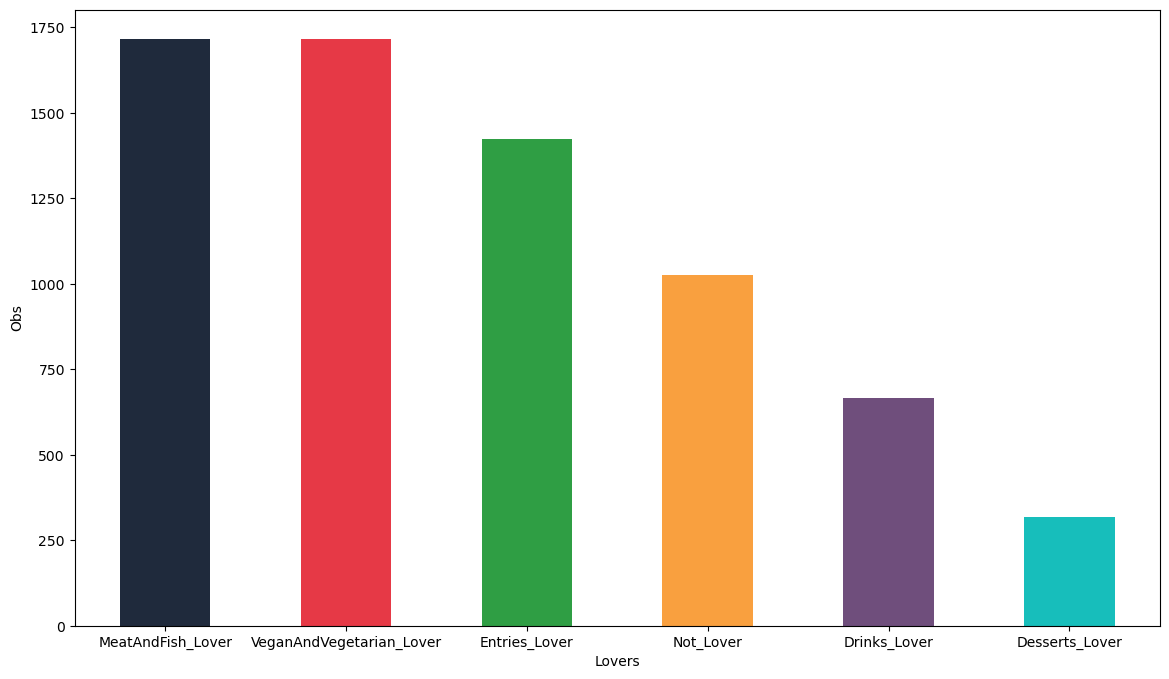

In [911]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_nv_k4_ = df3.plot.bar(figsize=(14,8), rot=0, color=colors)

ax_nv_k4_.set_xlabel('Lovers')
ax_nv_k4_.set_ylabel('Obs')
plt.show()

<AxesSubplot:xlabel='Score', ylabel='Mnt_Total'>

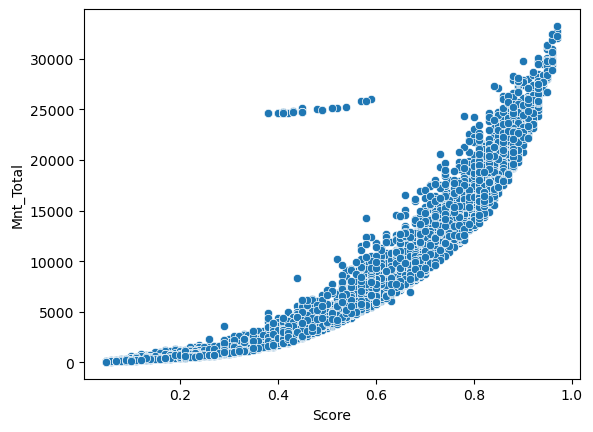

In [912]:
#sns.scatterplot( x=df_food.MntDesserts_norm, y=df_food.Score)
sns.scatterplot( x=df_food4.Score, y=df_food.Mnt_Total)

<AxesSubplot:xlabel='Score', ylabel='Freq'>

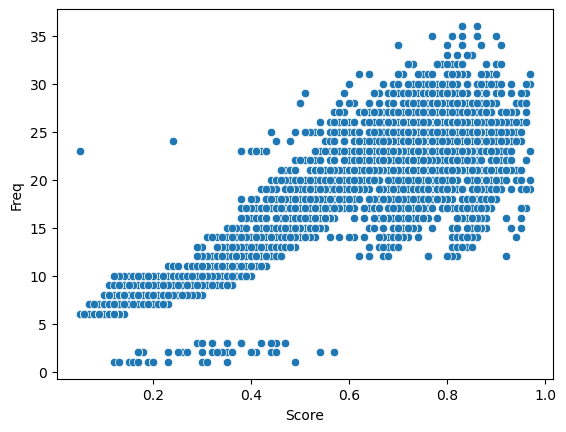

In [913]:
sns.scatterplot( x=df_food4.Score, y=df.Freq)

<AxesSubplot:xlabel='RFM_Score', ylabel='Freq'>

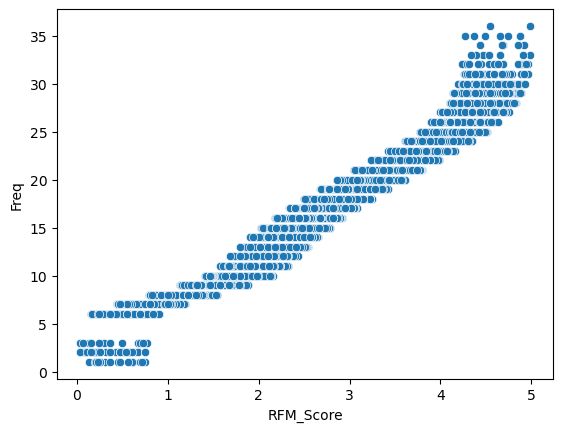

In [914]:
sns.scatterplot( x=df_food2.RFM_Score, y=df.Freq)

<AxesSubplot:xlabel='Score', ylabel='Income'>

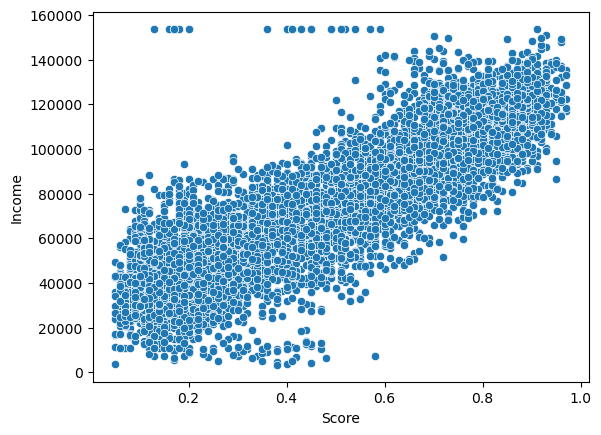

In [915]:
sns.scatterplot( x=df_food4.Score, y=df.Income)

<AxesSubplot:xlabel='RFM_Score', ylabel='NumAppPurchases'>

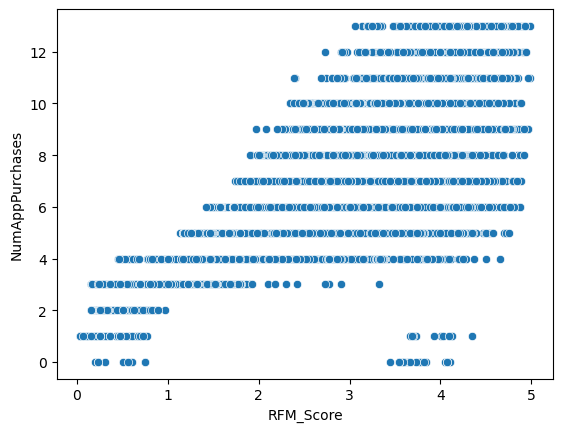

In [916]:
sns.scatterplot( x=df_food2.RFM_Score, y=sales.NumAppPurchases)

<AxesSubplot:xlabel='RFM_Score', ylabel='NumTakeAwayPurchases'>

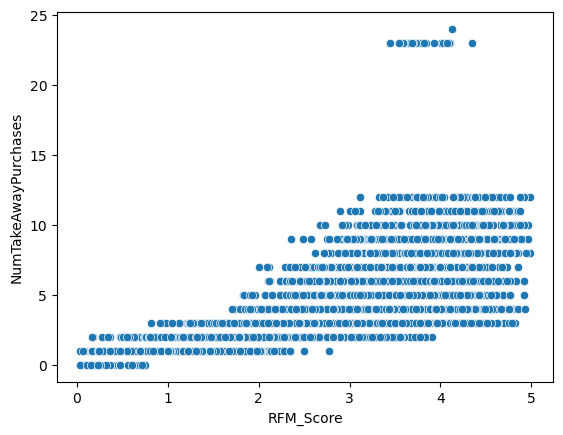

In [917]:
sns.scatterplot( x=df_food2.RFM_Score, y=sales.NumTakeAwayPurchases)

<AxesSubplot:xlabel='RFM_Score', ylabel='NumStorePurchases'>

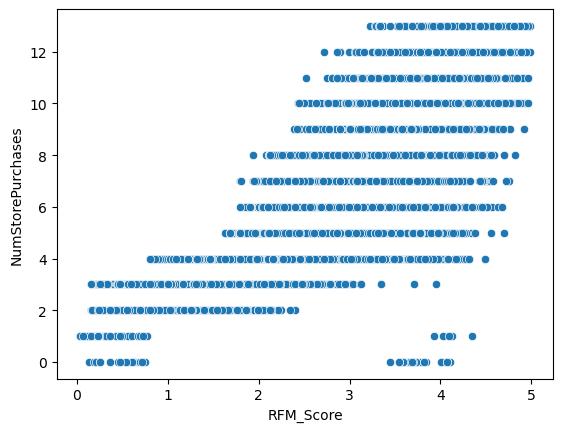

In [918]:
sns.scatterplot( x=df_food2.RFM_Score, y=sales.NumStorePurchases)

<AxesSubplot:xlabel='RFM_Score', ylabel='NumOfferPurchases'>

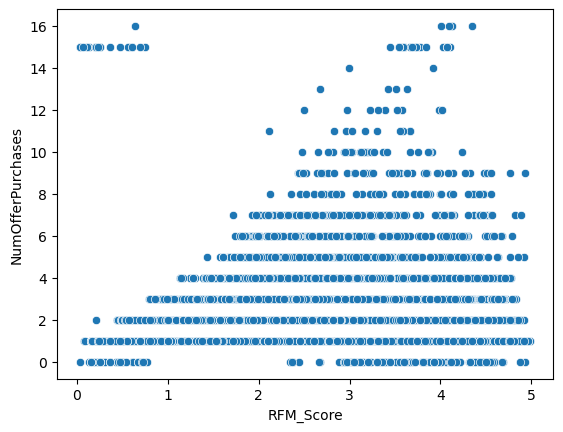

In [919]:
sns.scatterplot( x=df_food2.RFM_Score, y=sales.NumOfferPurchases)

In [920]:
sales.rename(columns = {'MntMeat&Fish': 'MntMeatAndFish', 'MntVegan&Vegetarian': 'MntVeganAndVegetarian'}, inplace = True)

<AxesSubplot:xlabel='RFM_Score', ylabel='MntMeatAndFish'>

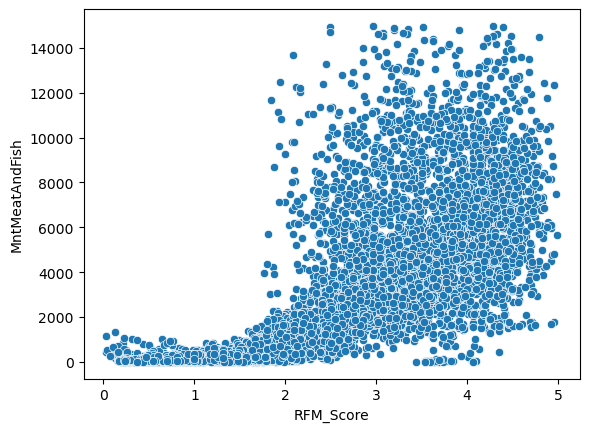

In [921]:
sns.scatterplot( x=df_food2.RFM_Score, y=sales.MntMeatAndFish)

<AxesSubplot:xlabel='RFM_Score', ylabel='MntVeganAndVegetarian'>

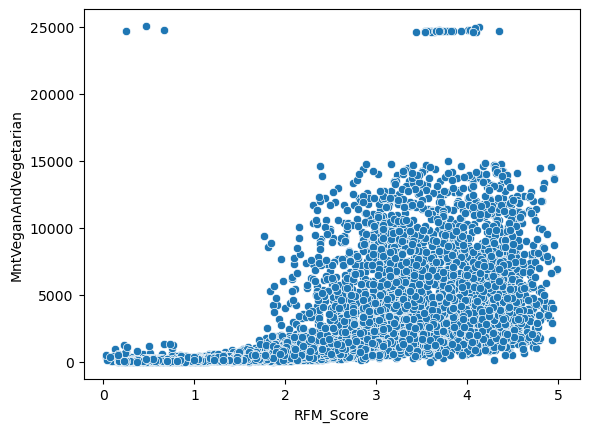

In [922]:
sns.scatterplot( x=df_food2.RFM_Score, y=sales.MntVeganAndVegetarian)

<AxesSubplot:xlabel='RFM_Score', ylabel='MntEntries'>

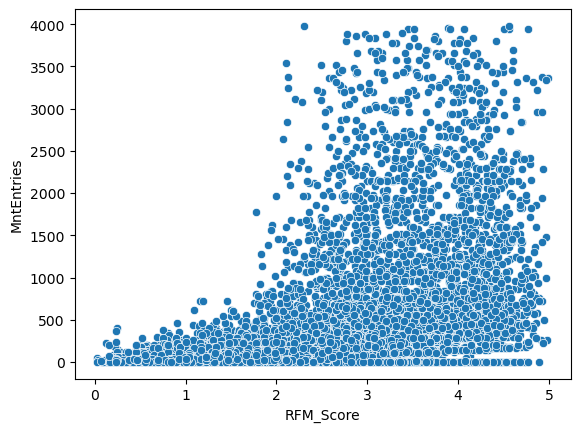

In [923]:
sns.scatterplot( x=df_food2.RFM_Score, y=sales.MntEntries)

<AxesSubplot:xlabel='RFM_Score', ylabel='MntDrinks'>

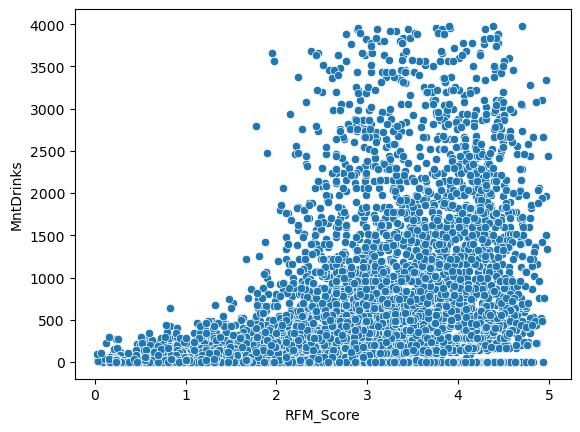

In [924]:
sns.scatterplot( x=df_food2.RFM_Score, y=sales.MntDrinks)

<AxesSubplot:xlabel='RFM_Score', ylabel='MntDesserts'>

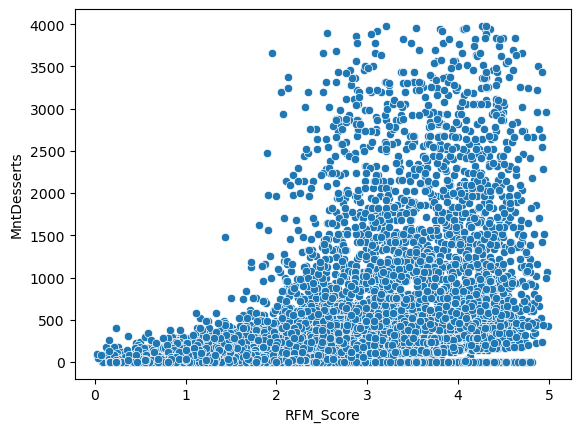

In [925]:
sns.scatterplot( x=df_food2.RFM_Score, y=sales.MntDesserts)

In [927]:
pd.crosstab(index=df['Income_bins'], columns=df_food['Customer_segment'], margins=True)

Customer_segment,High value Customer,Lost Customers,Low Value Customers,Medium Value Customer,Top Customers,All
Income_bins,,,,,,
Low,228,1208,1389,864,6,3695
Medium,1563,12,78,478,1007,3138
High,0,7,4,19,0,30
All,1791,1227,1471,1361,1013,6863


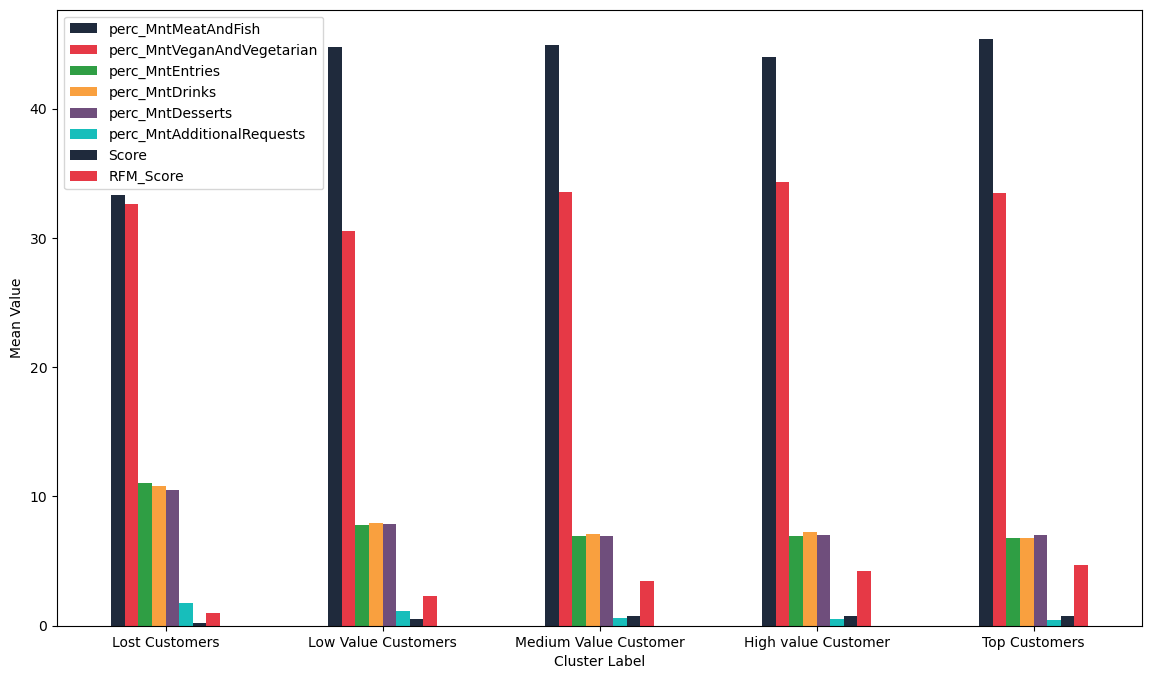

In [928]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_nv_k4_ = data3.plot.bar(figsize=(14,8), rot=0, color=colors)

ax_nv_k4_.set_xlabel('Cluster Label')
ax_nv_k4_.set_ylabel('Mean Value')
plt.show()

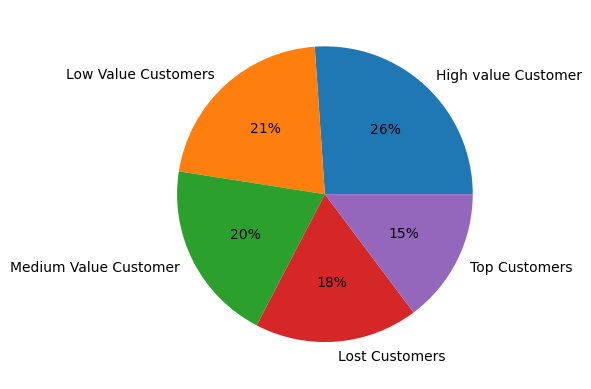

In [929]:
plt.pie(df_food.Customer_segment.value_counts(),
        labels=df_food.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [930]:
df7 = df_food.copy()
df7 = df7["Customer_segment"].value_counts()

print(df7)


High value Customer      1791
Low Value Customers      1471
Medium Value Customer    1361
Lost Customers           1227
Top Customers            1013
Name: Customer_segment, dtype: int64


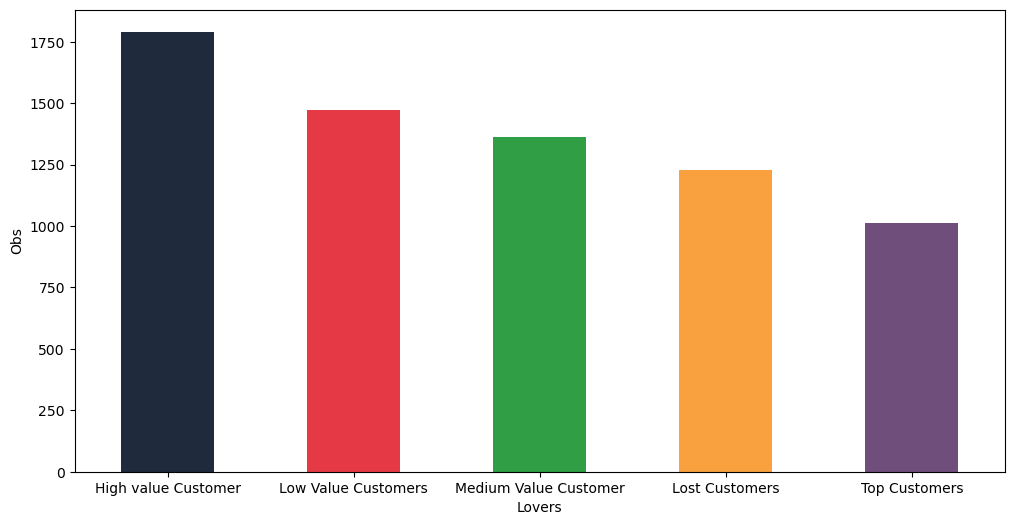

In [931]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_nv_k4_ = df7.plot.bar(figsize=(12,6), rot=0, color=colors)

ax_nv_k4_.set_xlabel('Lovers')
ax_nv_k4_.set_ylabel('Obs')
plt.show()

In [932]:
df.isna().sum()

Date_Adherence            0
Recency                   0
MntMeatAndFish            0
MntEntries                0
MntVeganAndVegetarian     0
MntDrinks                 0
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
Antiquity                 0
Freq                      0
Mnt_Total                 0
Avg_Ticket                0
Name                      0
Birthyear                 0
Education                 0
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
Gender                    0
Age                       0
Education_bins           14
Marital_Status_2          0
Marital_Status_4          0
Income_bins               0
dtype: int64

In [933]:
sales['Avg_Ticket'].describe()

count     6863.000000
mean       384.296304
std        492.178293
min          1.982609
25%         97.173611
50%        285.000000
75%        591.179654
max      24942.000000
Name: Avg_Ticket, dtype: float64

<AxesSubplot:xlabel='Income', ylabel='RFM_Score'>

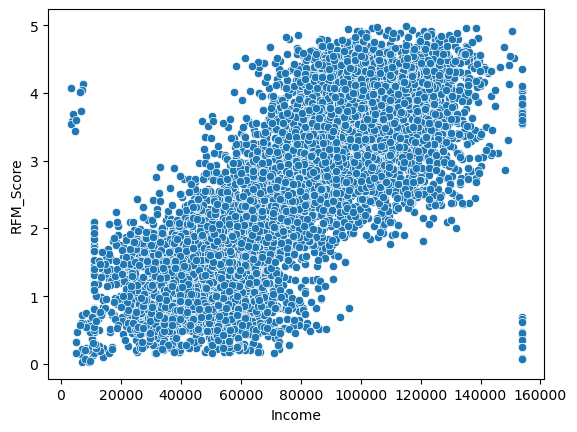

In [934]:
sns.scatterplot( x=df.Income, y=df_food.RFM_Score)

In [935]:
#Some thougths: Try to potencialize that group between 40000 and 80000. 
# Look at those ouliers 

In [936]:
df['MntDesserts'].describe()

count    6863.000000
mean      544.573481
std       803.880405
min         0.000000
25%        40.000000
50%       180.000000
75%       680.000000
max      3980.000000
Name: MntDesserts, dtype: float64

In [937]:
df_age_vs_amt_spt = df_2[['MntMeatAndFish', 'MntVeganAndVegetarian', 'MntEntries', 'MntDrinks' ,'MntDesserts']].copy()

In [938]:
df_age_vs_amt_spt.isna().sum()

MntMeatAndFish           0
MntVeganAndVegetarian    0
MntEntries               0
MntDrinks                0
MntDesserts              0
dtype: int64

In [939]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit(df_age_vs_amt_spt)
scaled_data=model.transform(df_age_vs_amt_spt)
print(scaled_data)

[[0.48264352 0.22922923 0.45728643 0.40201005 0.11055276]
 [0.39052069 0.18318318 0.08040201 0.12562814 0.08040201]
 [0.55941255 0.1041041  0.         0.         0.        ]
 ...
 [0.20360481 0.25625626 0.61809045 0.45226131 0.24623116]
 [0.00133511 0.00600601 0.05025126 0.04020101 0.        ]
 [0.01068091 0.01201201 0.02512563 0.17085427 0.0201005 ]]


In [940]:
from sklearn.cluster import KMeans

In [941]:
ks = range(1, 8)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(scaled_data)
    inertias.append(model.inertia_)

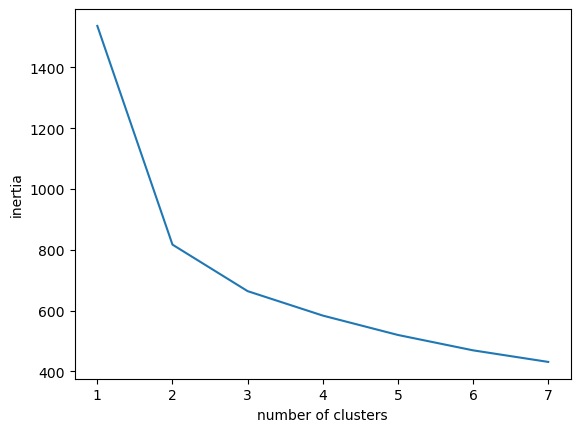

In [942]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [943]:
# from scipy.cluster import hierarchy
# #from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# # Get a random sample, as hierarchical clustering can take a lot of time to run.
# sales_kmeans = sales_kmeans.sample(n = 1000, random_state = 100)

# # create clusters using the "ward method"
# clusters = hierarchy.linkage(sales_kmeans, method="ward")

# # create the dendrogram using the hierarchy.dendrogram() method.
# plt.figure(figsize=(8, 6))
# dendrogram = hierarchy.dendrogram(clusters)

In [944]:
df_age_vs_amt_spt_k2 = df_age_vs_amt_spt.copy()

df_age_vs_amt_spt_k2[df_age_vs_amt_spt_k2.columns] = scaler.fit_transform(df_age_vs_amt_spt_k2)
model_k2 = KMeans(n_clusters=4, random_state = 100).fit(df_age_vs_amt_spt_k2)


In [945]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_age_vs_amt_spt_k2, model_k2.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.458


In [946]:
df_age_vs_amt_spt_k2['label'] = model_k2.labels_
df_age_vs_amt_spt_k2.groupby(['label']).mean().transpose()


label,0,1,2,3
MntMeatAndFish,0.431914,0.056811,0.304486,0.467792
MntVeganAndVegetarian,0.204371,0.036986,0.322821,0.681924
MntEntries,0.133337,0.035311,0.447781,0.296451
MntDrinks,0.127873,0.035617,0.472406,0.304333
MntDesserts,0.129900,0.035486,0.461935,0.300796


In [947]:
df_age_vs_amt_spt_k2

,MntMeatAndFish,MntVeganAndVegetarian,MntEntries,MntDrinks,MntDesserts,label
CustomerID,,,,,,
11054,0.482644,0.229229,0.457286,0.402010,0.110553,2
17117,0.390521,0.183183,0.080402,0.125628,0.080402,0
31751,0.559413,0.104104,0.000000,0.000000,0.000000,0
12947,0.339786,0.157157,0.070352,0.035176,0.140704,0
11402,0.022029,0.016016,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...
23699,0.019359,0.012012,0.005025,0.000000,0.010050,1
23255,0.015354,0.035035,0.020101,0.005025,0.020101,1
5798,0.203605,0.256256,0.618090,0.452261,0.246231,2


In [948]:
centroids = model_k2.cluster_centers_
centroids

array([[0.43289661, 0.20463954, 0.13347411, 0.12776318, 0.12982716],
       [0.05696071, 0.03718771, 0.03539163, 0.03577011, 0.03564521],
       [0.30478196, 0.32262355, 0.44750672, 0.47287309, 0.46155545],
       [0.46742037, 0.68237004, 0.29697213, 0.30405715, 0.30140178]])

In [949]:
test = df_age_vs_amt_spt_k2.groupby(['label']).mean()

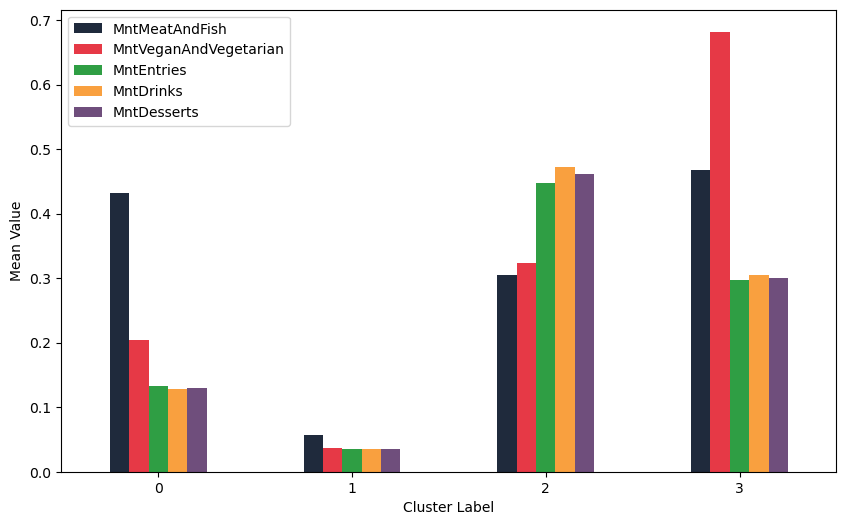

In [950]:
colors =  ['#1F2A3C', '#E63946', '#2F9E44', '#F9A03F', '#6F4E7C', '#17BEBB']
ax_nv_k4 = test.plot.bar(figsize=(10,6), rot=0, color=colors)

ax_nv_k4.set_xlabel('Cluster Label')
ax_nv_k4.set_ylabel('Mean Value')
plt.show()

#### On cluster 0 we see predominance in meat and fish with low amount spent on other options 
#### On cluster 1 we se a low amount spent on every option
#### On cluster 2 we see a balanced distribution with a predominance in entries, drinks and desserts
#### On cluster 3 we see predominance in vegan and vegetarian 

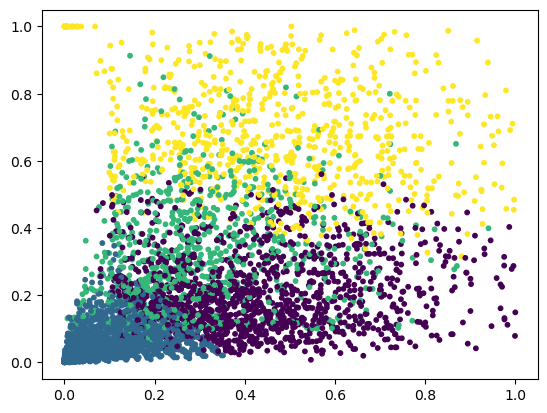

In [951]:
plt.scatter(df_age_vs_amt_spt_k2.MntMeatAndFish, df_age_vs_amt_spt_k2.MntVeganAndVegetarian,  c=df_age_vs_amt_spt_k2.label, s=10)
plt.show()